In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data
data = pd.read_csv('imports-85.data')
data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
# renaming columns
column_names = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
data.columns = column_names

# adjusting table preview
pd.options.display.max_columns = 27

data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
# mapping non_numerical data with int values
data['make_number'] = data.groupby('make').ngroup()+1

data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_number
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,2
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,2
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,22
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,22
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,22
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470,22


In [5]:
# inspecting values by columns
for col in data.columns:
    print(col, data[col].unique())

symboling [ 3  1  2  0 -1 -2]
normalized-losses ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type ['gas' 'diesel']
aspiration ['std' 'turbo']
num-of-doors ['two' 'four' '?']
body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels ['rwd' 'fwd' '4wd']
engine-location ['front' 'rear']
wheel-base [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.

In [6]:
# replacing '?' with NaN so that data can be converted into numerical type
data.replace('?', np.nan, inplace=True)

In [7]:
# extracting only columns with numerical values
num_data = data[['normalized-losses', 'make_number', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]
pd.options.mode.chained_assignment = None # to avoid SettingWithCopyWarning
num_data = num_data.astype(float)
num_data['make_number'] = num_data['make_number'].astype(int)

In [8]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   make_number        204 non-null    int64  
 2   wheel-base         204 non-null    float64
 3   length             204 non-null    float64
 4   width              204 non-null    float64
 5   height             204 non-null    float64
 6   curb-weight        204 non-null    float64
 7   engine-size        204 non-null    float64
 8   bore               200 non-null    float64
 9   stroke             200 non-null    float64
 10  compression-ratio  204 non-null    float64
 11  horsepower         202 non-null    float64
 12  peak-rpm           202 non-null    float64
 13  city-mpg           204 non-null    float64
 14  highway-mpg        204 non-null    float64
 15  price              200 non-null    float64
dtypes: float64(15), int64(1)
m

In [9]:
# checking how many NaN values
num_data.isnull().sum().to_frame()

,0
normalized-losses,40
make_number,0
wheel-base,0
length,0
width,0
height,0
curb-weight,0
engine-size,0
bore,4
stroke,4


In [10]:
# removing rows with NaN values in price column (price column is the target feature, so it is no use to have NaN values in that column)
num_data.dropna(subset=['price'], inplace=True)
# replacing other NaN values with mean values
num_data.fillna(num_data.mean(), inplace=True)

num_data.isnull().sum()

normalized-losses    0
make_number          0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
# converting miles/gallon to km/litres (kml = mpg/2.35)
num_data['city-km/l'] = num_data['city-mpg'] / 2.35
num_data['highway-km/l'] = num_data['highway-mpg'] / 2.35
num_data

,normalized-losses,make_number,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-km/l,highway-km/l
0,122.0,1,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,8.936170,11.489362
1,122.0,1,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,8.085106,11.063830
2,164.0,2,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,10.212766,12.765957
3,164.0,2,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,7.659574,9.361702
4,122.0,2,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0,8.085106,10.638298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,95.0,22,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,9.787234,11.914894
200,95.0,22,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,8.085106,10.638298
201,95.0,22,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,7.659574,9.787234
202,95.0,22,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0,11.063830,11.489362


In [12]:
# normalizing all columns to range between 0 and 1, except 'make_number', 'price' (the target) and 'horsepower' (it will be binned)
make_number_column = num_data['make_number']
price_column = num_data['price']
horsepower_column = num_data['horsepower']
num_data = (num_data - num_data.min()) / (num_data.max() - num_data.min())
num_data['make_number'] = make_number_column
num_data['price'] = price_column
num_data['horsepower'] = horsepower_column
num_data

,normalized-losses,make_number,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-km/l,highway-km/l
0,0.298429,1,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,111.0,0.346939,0.222222,0.289474,16500.0,0.222222,0.289474
1,0.298429,1,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,154.0,0.346939,0.166667,0.263158,16500.0,0.166667,0.263158
2,0.518325,2,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,102.0,0.551020,0.305556,0.368421,13950.0,0.305556,0.368421
3,0.518325,2,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,115.0,0.551020,0.138889,0.157895,17450.0,0.138889,0.157895
4,0.298429,2,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.09375,110.0,0.551020,0.166667,0.236842,15250.0,0.166667,0.236842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.157068,22,0.655977,0.711940,0.735043,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,114.0,0.510204,0.277778,0.315789,16845.0,0.277778,0.315789
200,0.157068,22,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,160.0,0.469388,0.166667,0.236842,19045.0,0.166667,0.236842
201,0.157068,22,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,134.0,0.551020,0.138889,0.184211,21485.0,0.138889,0.184211
202,0.157068,22,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,106.0,0.265306,0.361111,0.289474,22470.0,0.361111,0.289474


In [13]:
# transforming (binning) continuous numerical variables in 'horsepower' column into discrete categorical groups (bins), for later grouped analysis
num_data['horsepower'] = num_data['horsepower'].astype(int)
bins = np.linspace(num_data['horsepower'].min(), num_data['horsepower'].max(), 4)
group_names = ['Low', 'Medium', 'High']
num_data['horsepower_groups'] = pd.cut(num_data['horsepower'], bins, labels=group_names, include_lowest=True)
num_data[['horsepower', 'horsepower_groups']].head(20)

,horsepower,horsepower_groups
0,111,Low
1,154,Medium
2,102,Low
3,115,Low
4,110,Low
5,110,Low
6,110,Low
7,140,Medium
9,101,Low
10,101,Low


In [14]:
num_data['horsepower_groups'].value_counts().to_frame()

,horsepower_groups
Low,152
Medium,43
High,5


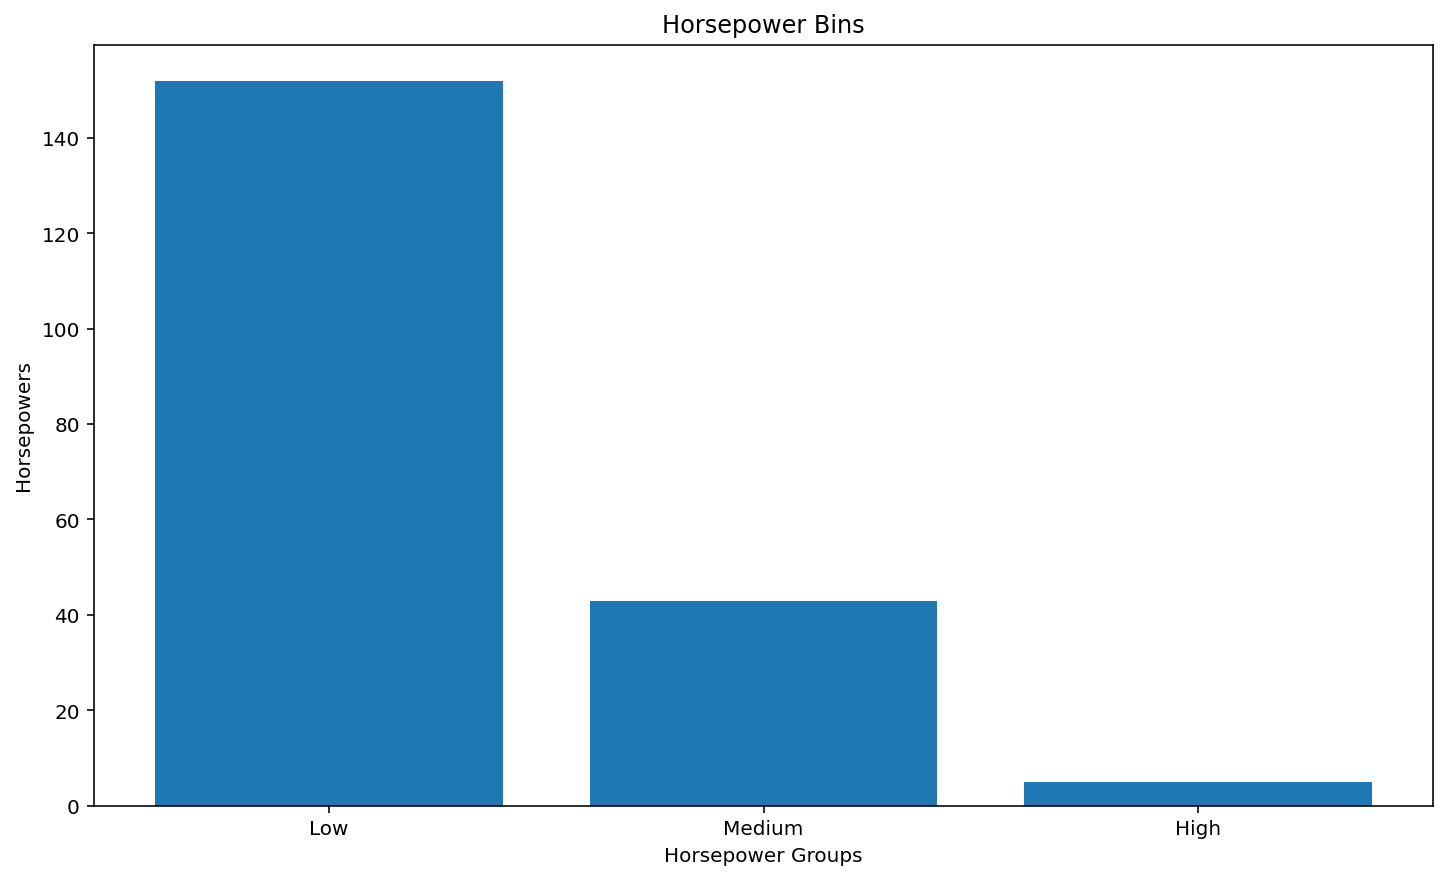

In [15]:
plt.bar(group_names, num_data['horsepower_groups'].value_counts())
plt.xlabel('Horsepower Groups')
plt.ylabel('Horsepowers')
plt.title('Horsepower Bins')
plt.show()

In [16]:
num_data

,normalized-losses,make_number,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-km/l,highway-km/l,horsepower_groups
0,0.298429,1,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,111,0.346939,0.222222,0.289474,16500.0,0.222222,0.289474,Low
1,0.298429,1,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,154,0.346939,0.166667,0.263158,16500.0,0.166667,0.263158,Medium
2,0.518325,2,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,102,0.551020,0.305556,0.368421,13950.0,0.305556,0.368421,Low
3,0.518325,2,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,115,0.551020,0.138889,0.157895,17450.0,0.138889,0.157895,Low
4,0.298429,2,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.09375,110,0.551020,0.166667,0.236842,15250.0,0.166667,0.236842,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.157068,22,0.655977,0.711940,0.735043,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,114,0.510204,0.277778,0.315789,16845.0,0.277778,0.315789,Low
200,0.157068,22,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,160,0.469388,0.166667,0.236842,19045.0,0.166667,0.236842,Medium
201,0.157068,22,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,134,0.551020,0.138889,0.184211,21485.0,0.138889,0.184211,Medium
202,0.157068,22,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,106,0.265306,0.361111,0.289474,22470.0,0.361111,0.289474,Low


In [17]:
num_data_corr = num_data.corr()
num_data_corr

,normalized-losses,make_number,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-km/l,highway-km/l
normalized-losses,1.000000,-0.256865,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029867,0.055759,-0.114738,0.217323,0.239580,-0.225255,-0.182011,0.133999,-0.225255,-0.182011
make_number,-0.256865,1.000000,0.058298,0.107235,-0.013687,0.215015,0.017135,-0.084857,0.244489,-0.226015,0.130987,-0.063273,-0.217590,0.059980,0.054335,-0.164899,0.059980,0.054335
wheel-base,-0.057068,0.058298,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501534,0.144675,0.249689,0.375732,-0.364971,-0.480029,-0.552211,0.589147,-0.480029,-0.552211
length,0.019433,0.107235,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610817,0.120888,0.159203,0.580477,-0.286754,-0.667658,-0.700186,0.691044,-0.667658,-0.700186
width,0.086961,-0.013687,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548478,0.182855,0.189008,0.617032,-0.247388,-0.638155,-0.684700,0.752795,-0.638155,-0.684700
height,-0.377664,0.215015,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187794,-0.081273,0.259526,-0.085725,-0.315756,-0.057087,-0.111568,0.137284,-0.057087,-0.111568
curb-weight,0.099404,0.017135,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644532,0.168642,0.156444,0.758095,-0.279411,-0.750390,-0.795515,0.834420,-0.750390,-0.795515
engine-size,0.112362,-0.084857,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572786,0.208004,0.029005,0.822656,-0.256702,-0.651002,-0.679877,0.872337,-0.651002,-0.679877
bore,-0.029867,0.244489,0.501534,0.610817,0.548478,0.187794,0.644532,0.572786,1.000000,-0.051087,0.002021,0.566690,-0.267010,-0.581365,-0.590753,0.543431,-0.581365,-0.590753
stroke,0.055759,-0.226015,0.144675,0.120888,0.182855,-0.081273,0.168642,0.208004,-0.051087,1.000000,0.186761,0.100351,-0.066173,-0.040677,-0.040282,0.083296,-0.040677,-0.040282


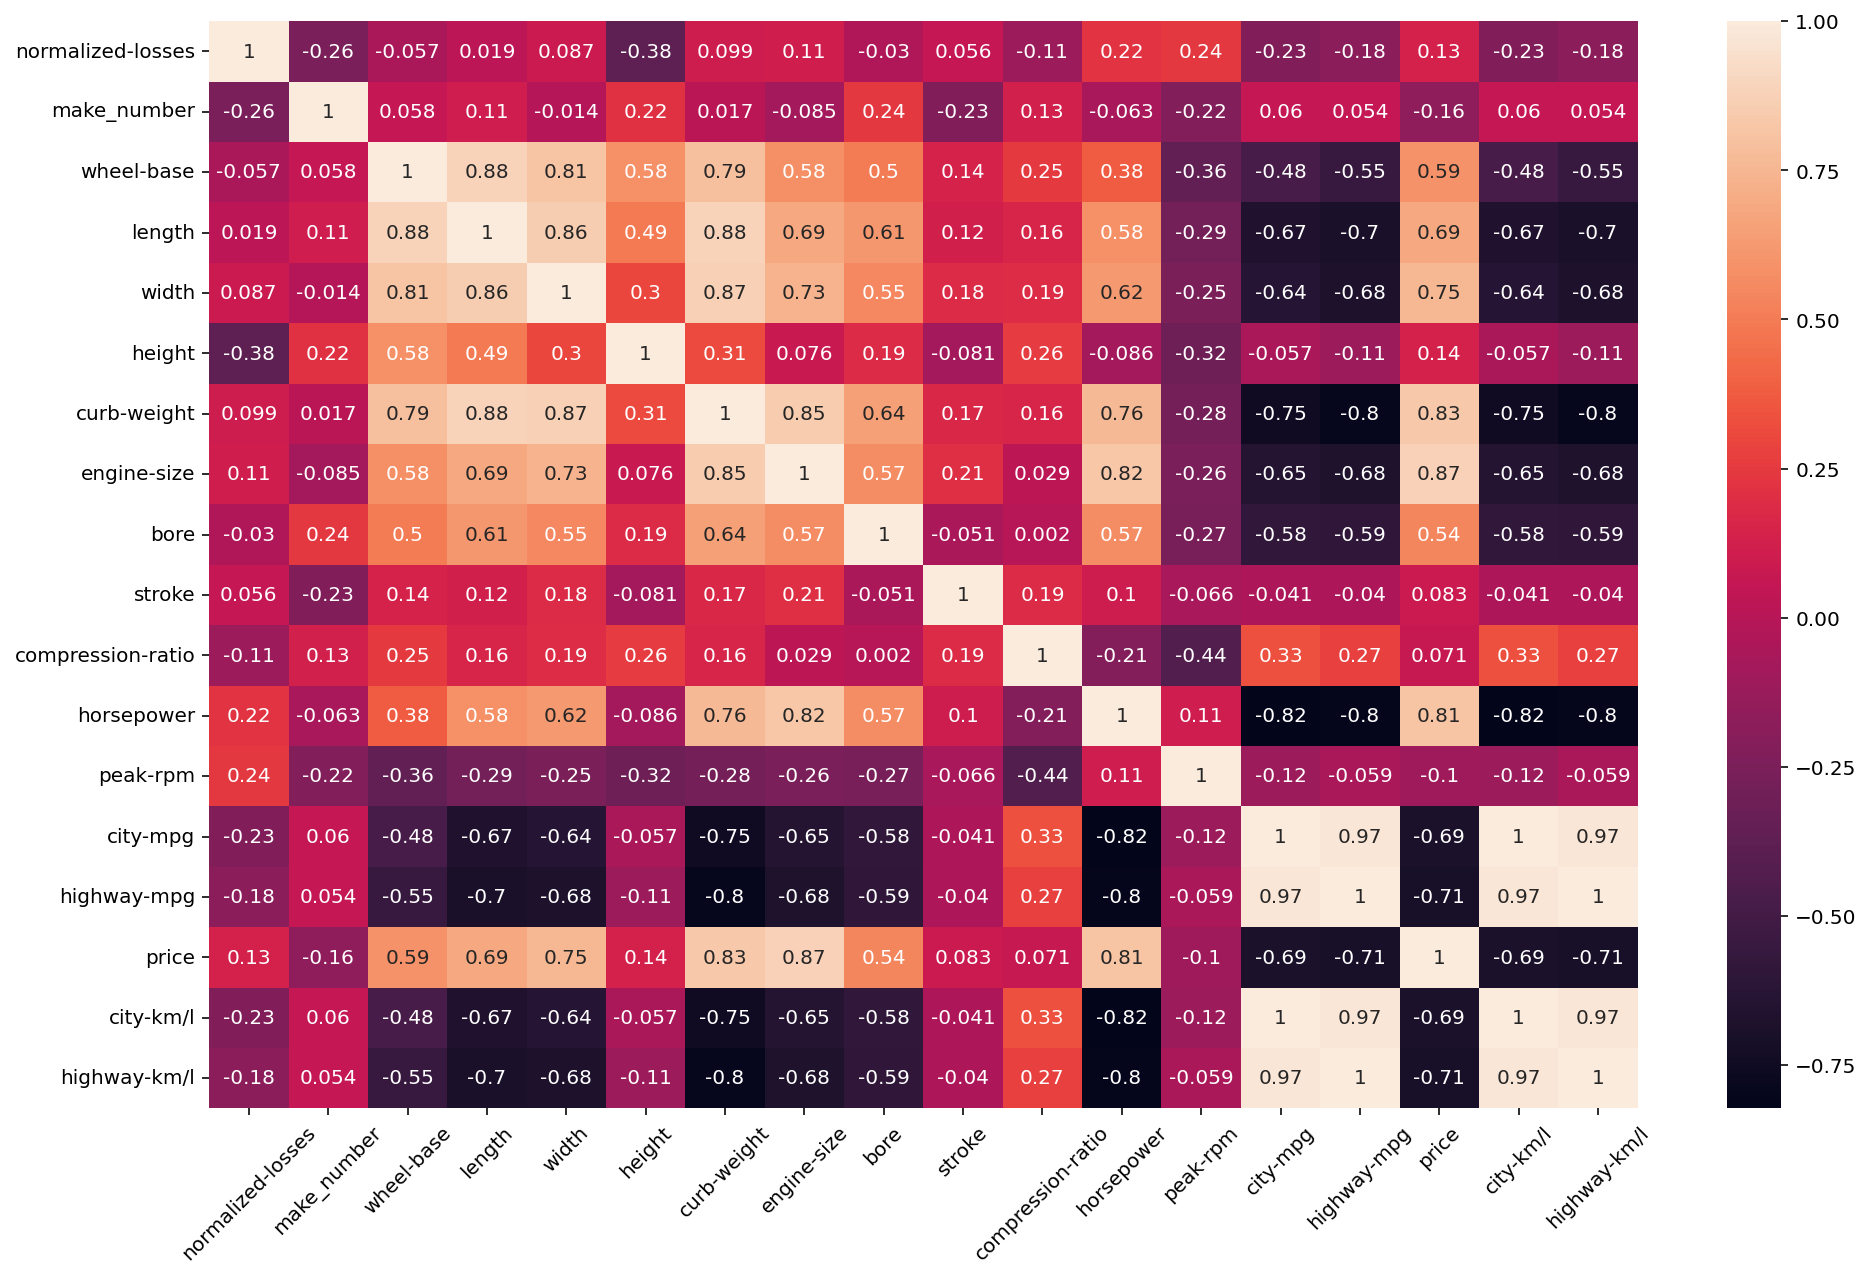

In [89]:
plt.figure(figsize=(16,10))
sns.heatmap(num_data_corr, annot=True)
plt.xticks(rotation=45)
plt.show()

In [18]:
num_data_corr['price']

normalized-losses    0.133999
make_number         -0.164899
wheel-base           0.589147
length               0.691044
width                0.752795
height               0.137284
curb-weight          0.834420
engine-size          0.872337
bore                 0.543431
stroke               0.083296
compression-ratio    0.071176
horsepower           0.809779
peak-rpm            -0.101519
city-mpg            -0.687186
highway-mpg         -0.705115
price                1.000000
city-km/l           -0.687186
highway-km/l        -0.705115
Name: price, dtype: float64

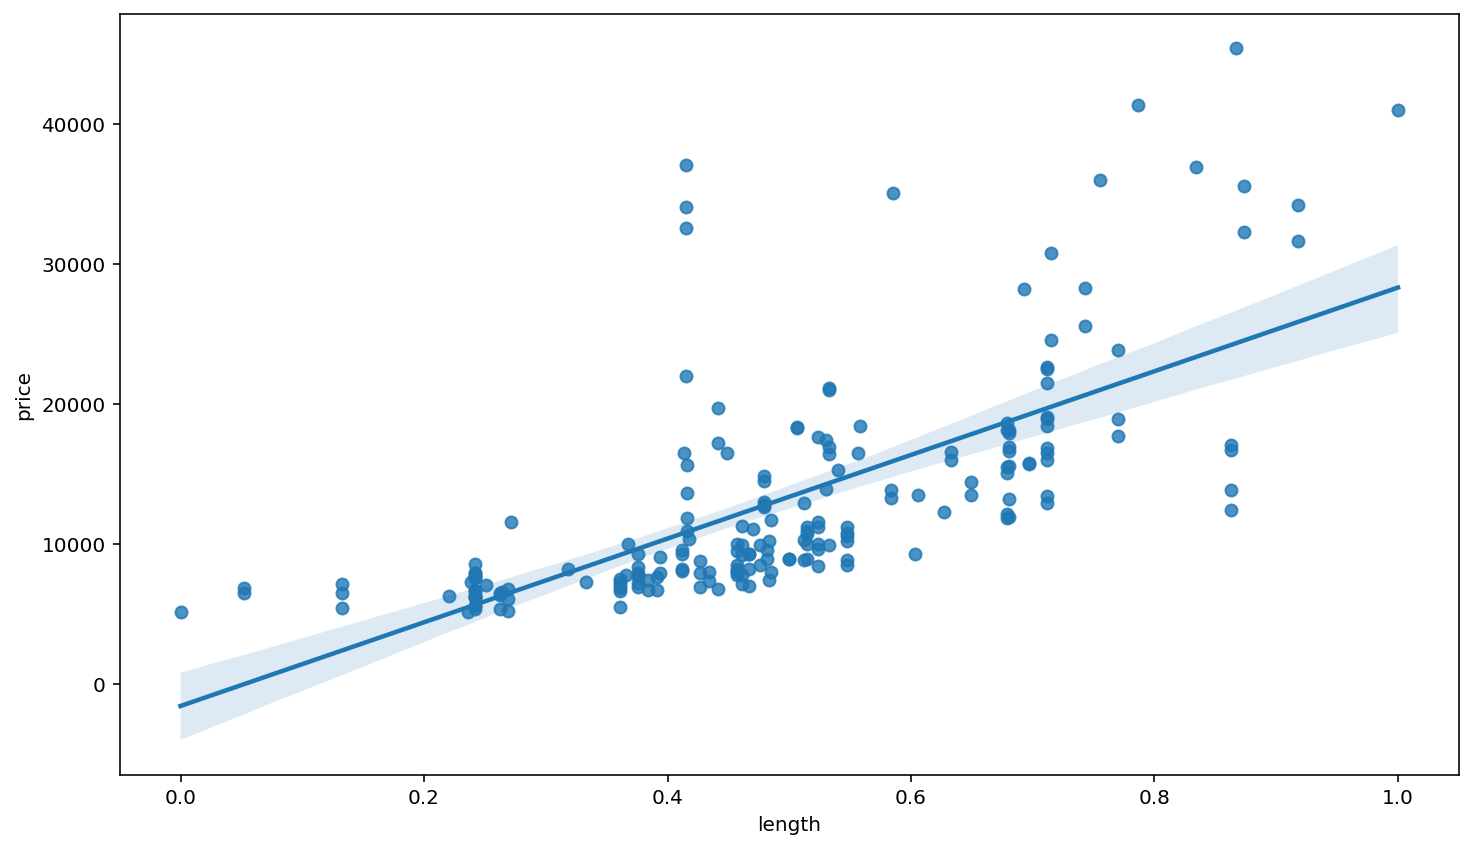

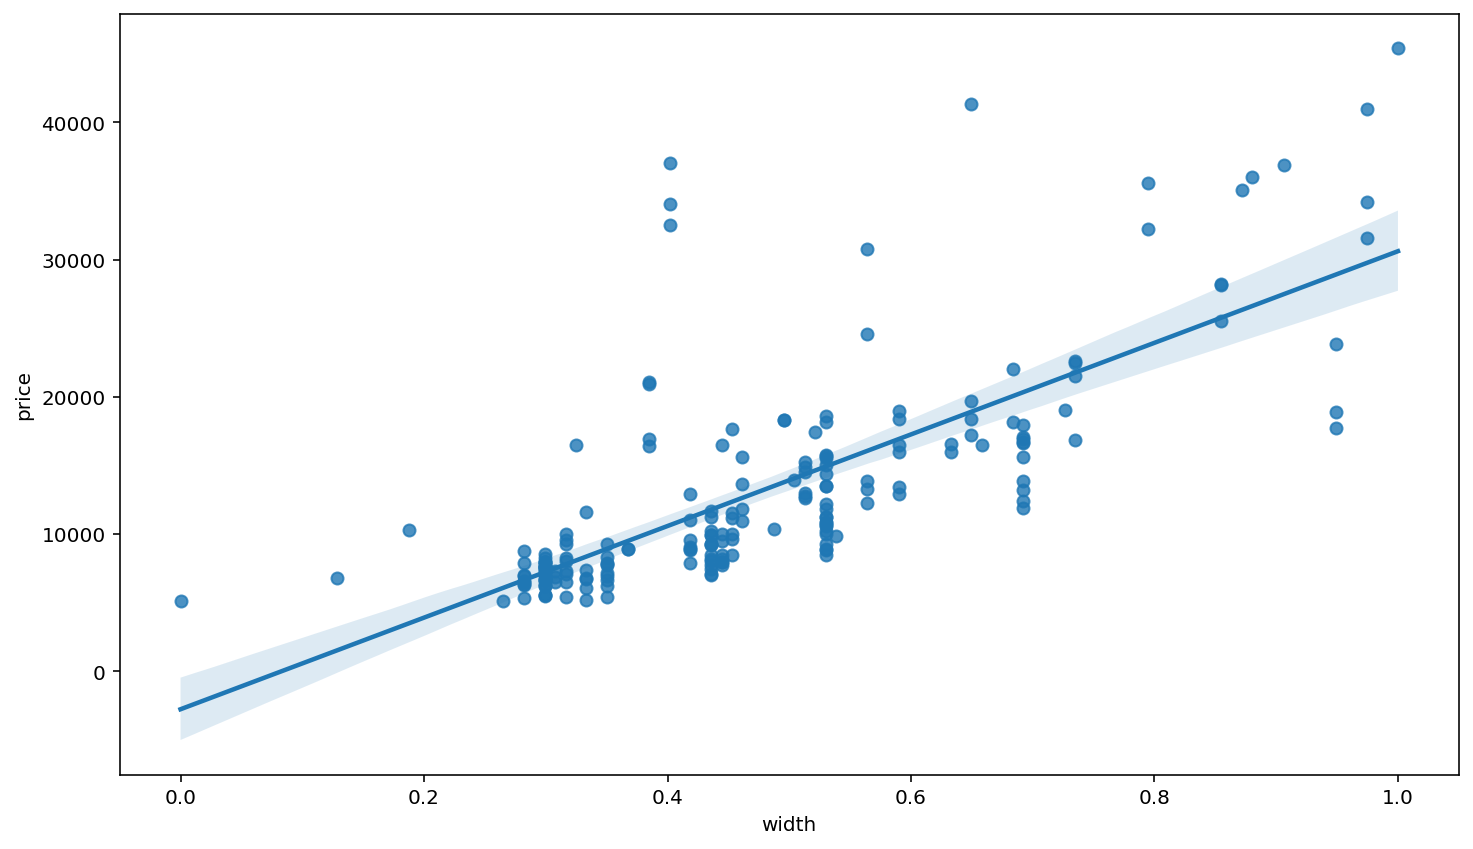

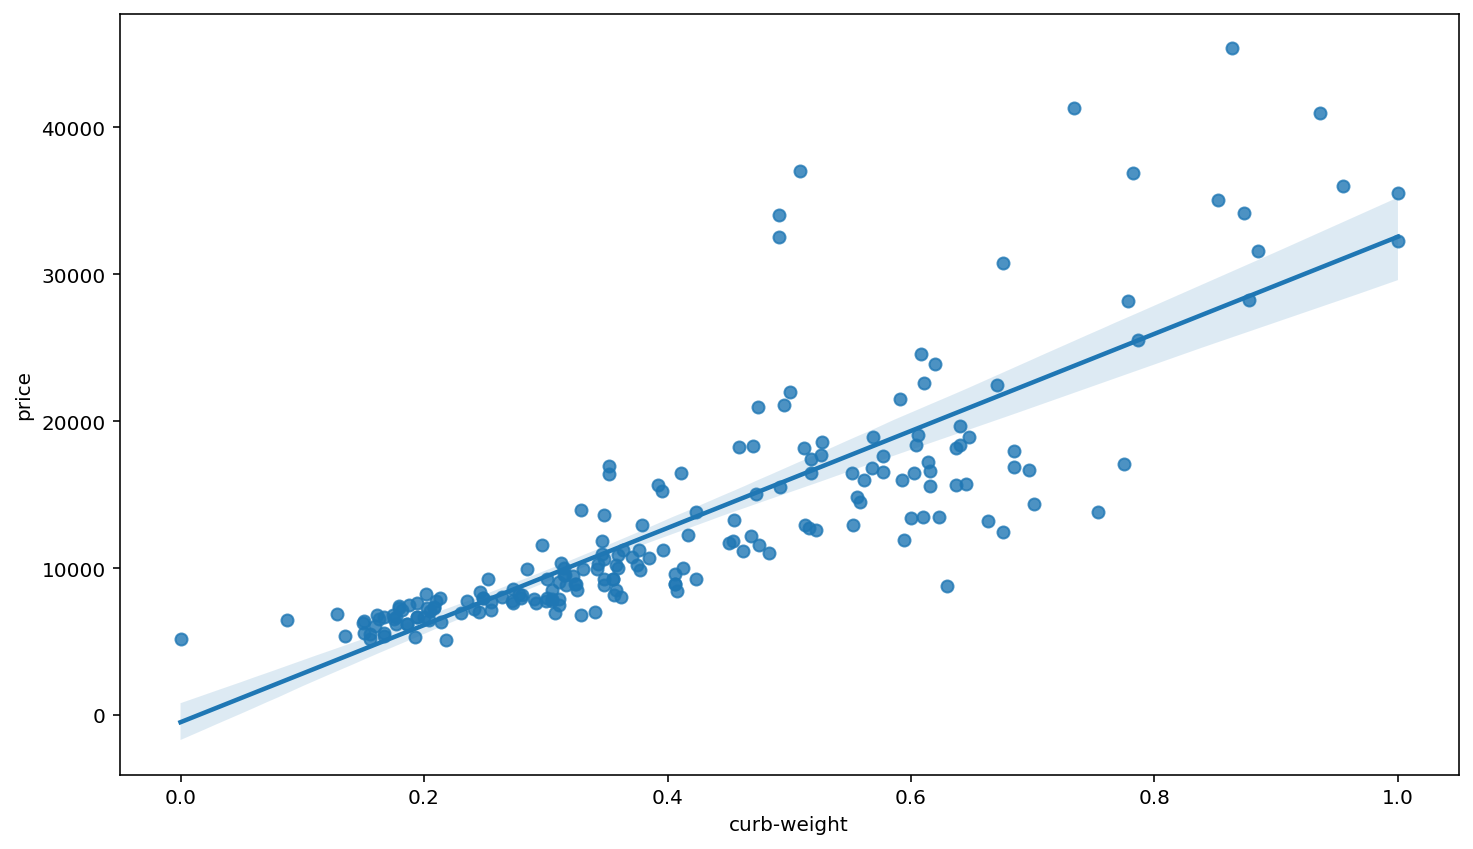

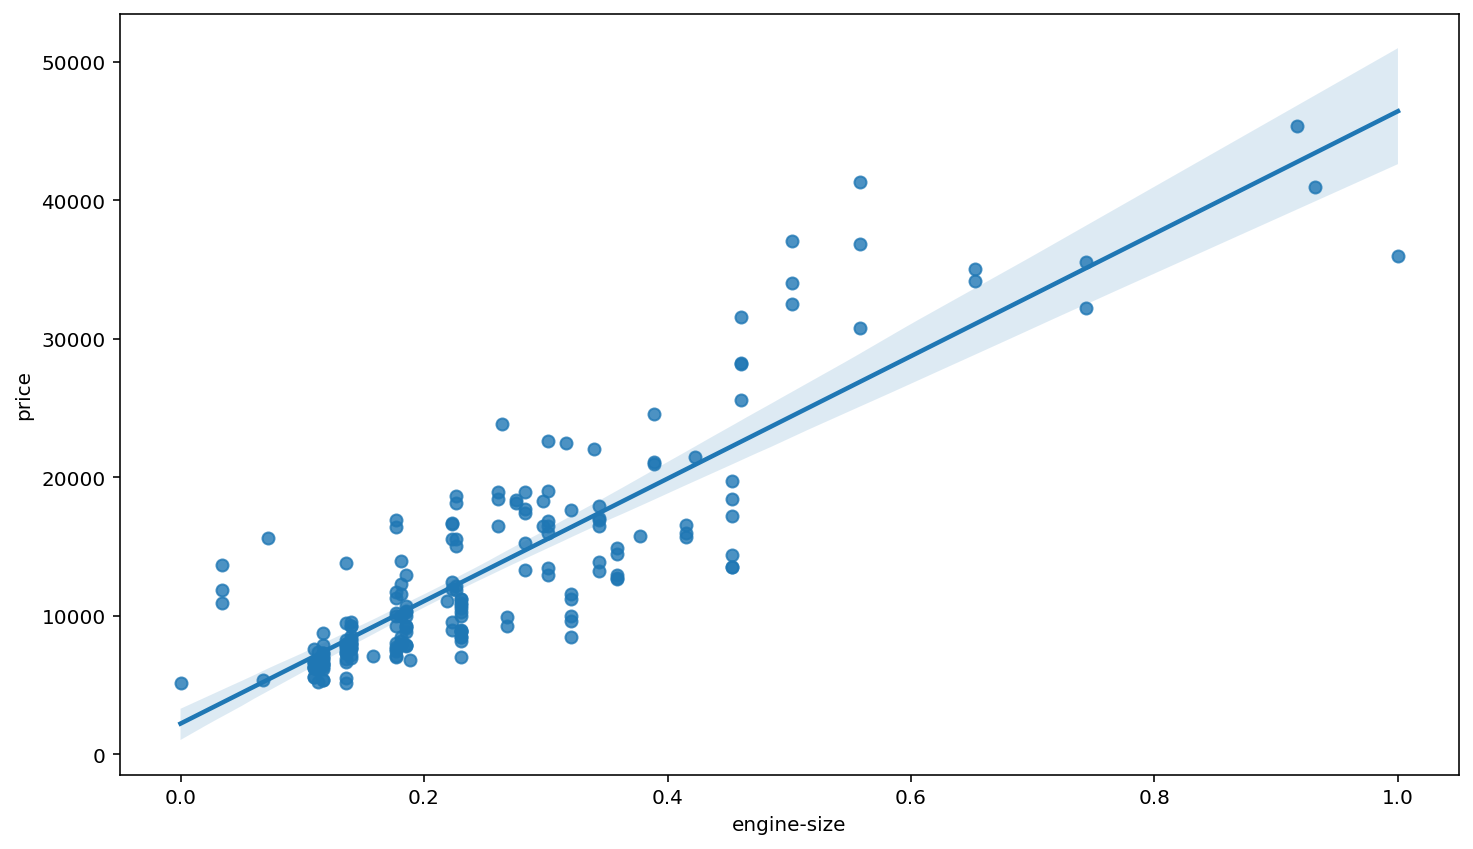

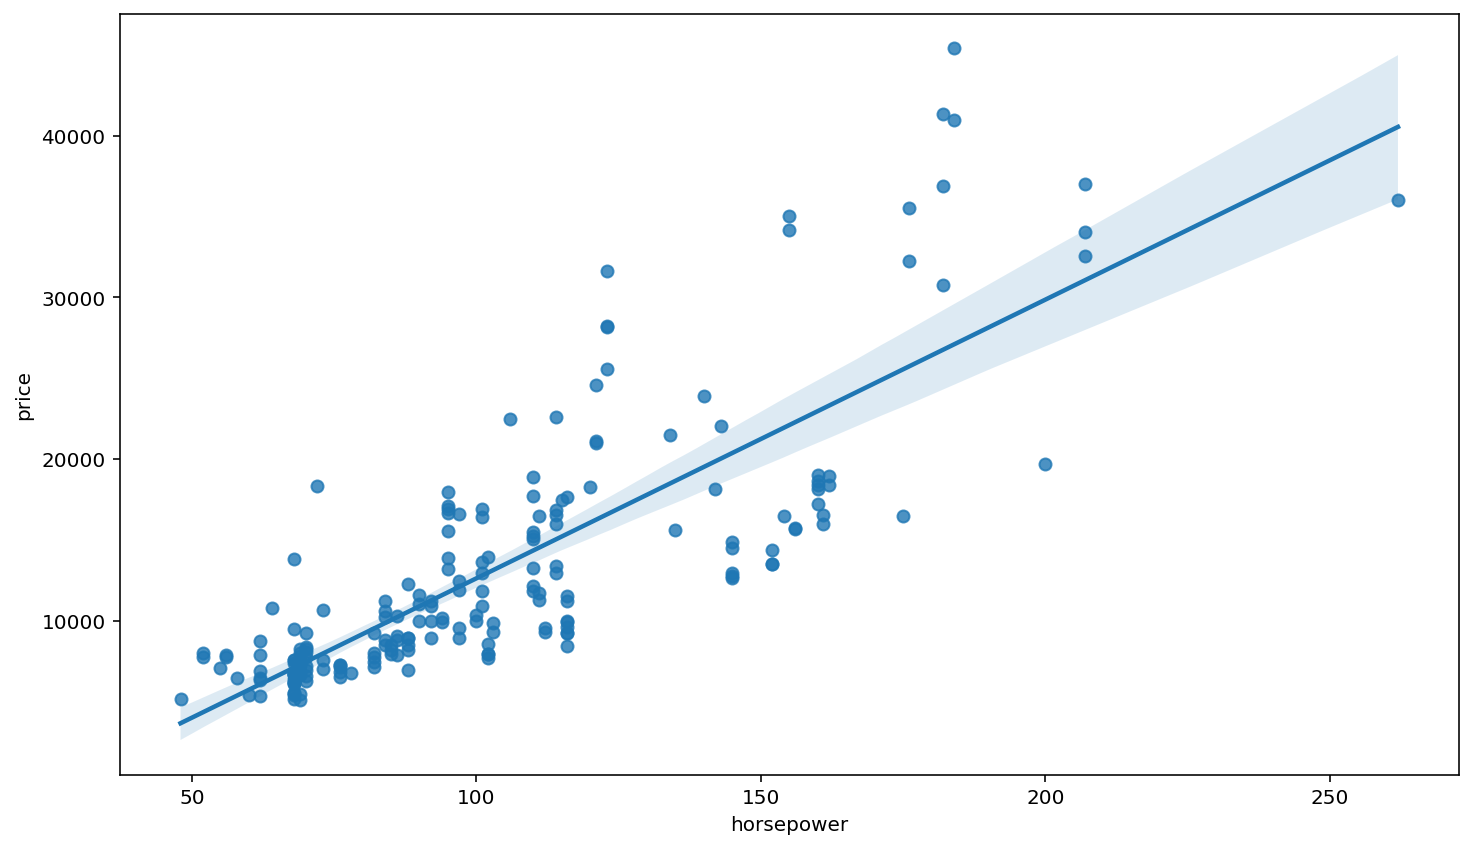

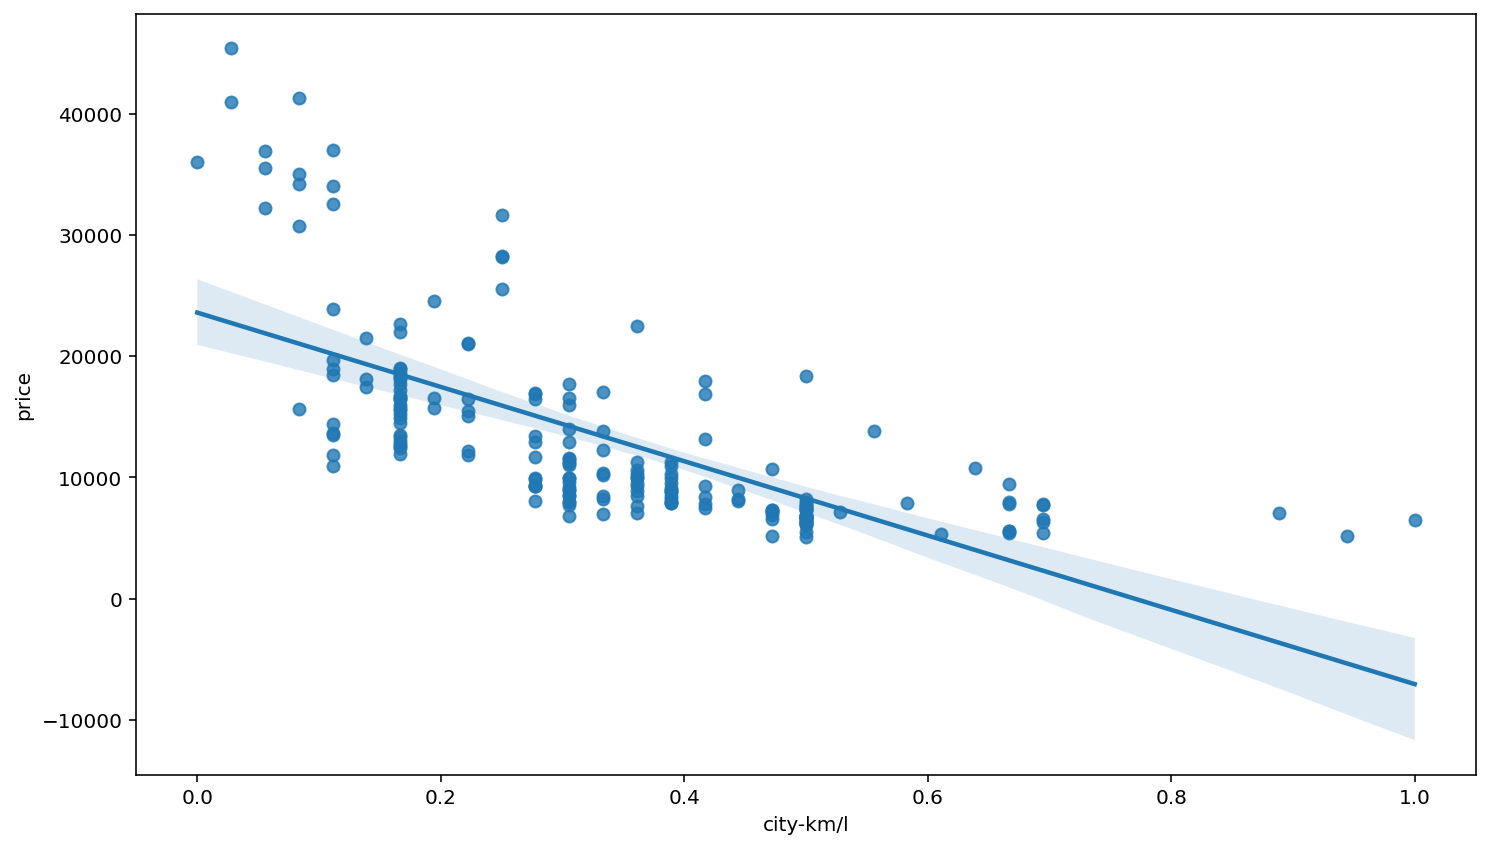

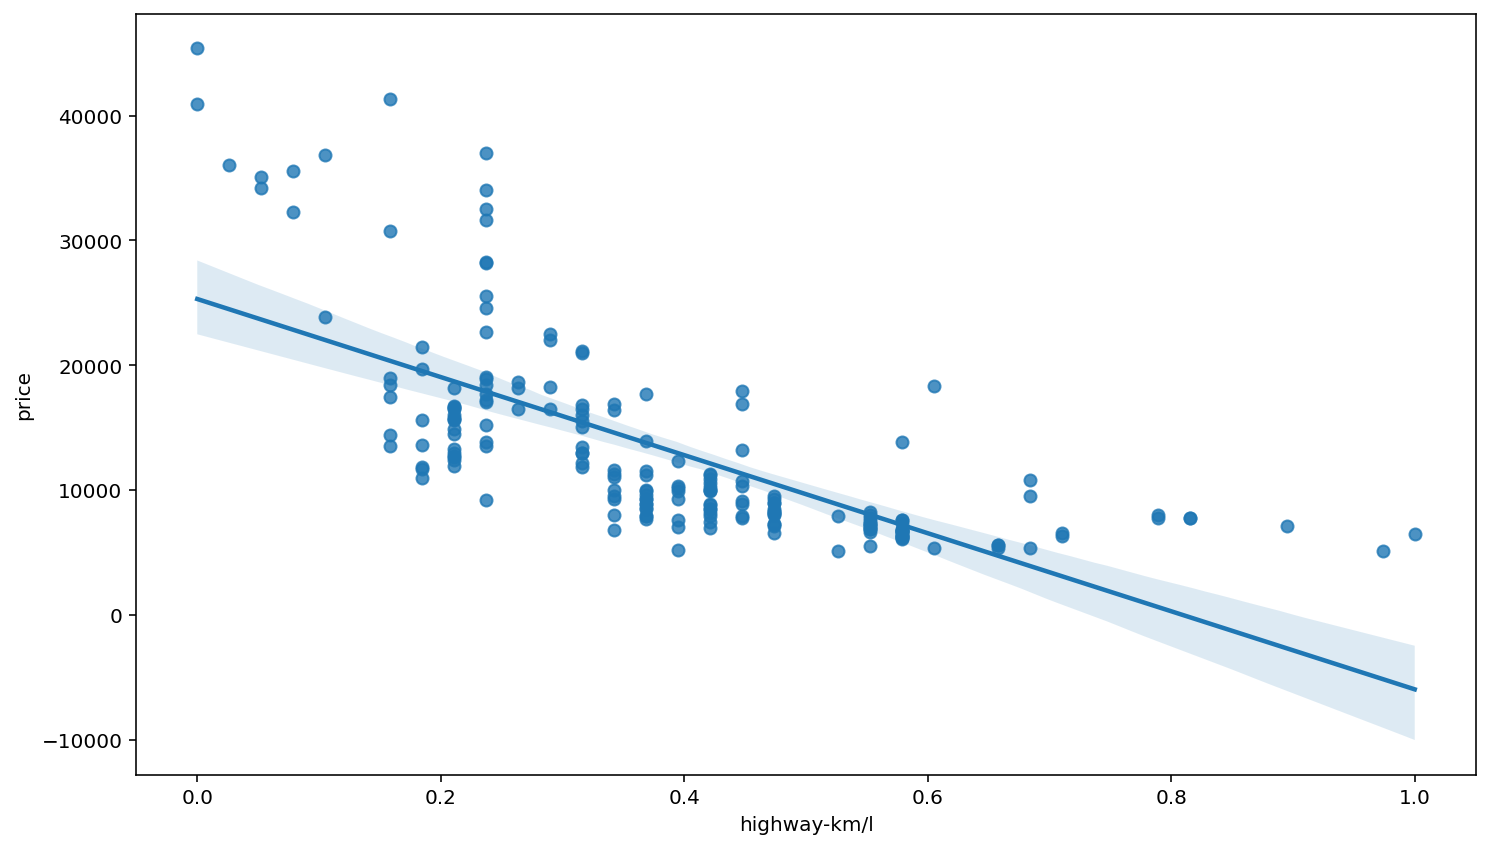

In [19]:
# correlations
for col in ['length', 'width', 'curb-weight', 'engine-size', 'horsepower', 'city-km/l', 'highway-km/l']:
    sns.regplot(x=col, y='price', data=num_data)
    plt.show()

In [20]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_number
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,2
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,2
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,2


In [21]:
# extracting categorical columns + price column
cat_data = data[['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'price']]
cat_data

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500
1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450
4,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi,15250
...,...,...,...,...,...,...,...,...,...,...,...
199,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,16845
200,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,19045
201,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,21485
202,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,22470


In [22]:
cat_data.isnull().sum().to_frame()

,0
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
engine-type,0
num-of-cylinders,0
fuel-system,0


In [23]:
cat_data.dropna(inplace=True)

In [24]:
cat_data['price'] = cat_data['price'].astype(float)
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 203
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              198 non-null    object 
 1   fuel-type         198 non-null    object 
 2   aspiration        198 non-null    object 
 3   num-of-doors      198 non-null    object 
 4   body-style        198 non-null    object 
 5   drive-wheels      198 non-null    object 
 6   engine-location   198 non-null    object 
 7   engine-type       198 non-null    object 
 8   num-of-cylinders  198 non-null    object 
 9   fuel-system       198 non-null    object 
 10  price             198 non-null    float64
dtypes: float64(1), object(10)
memory usage: 18.6+ KB


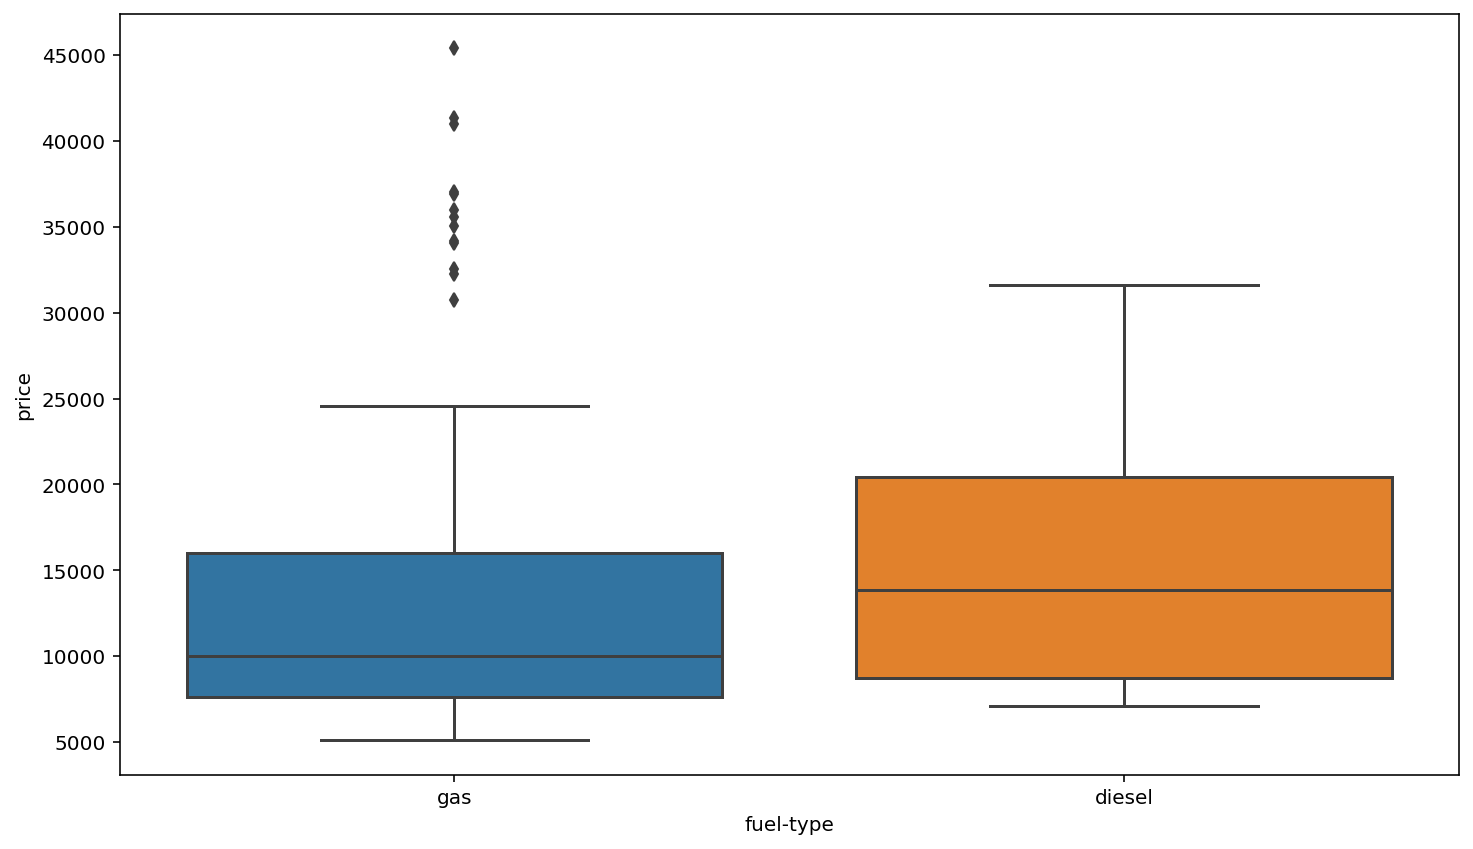

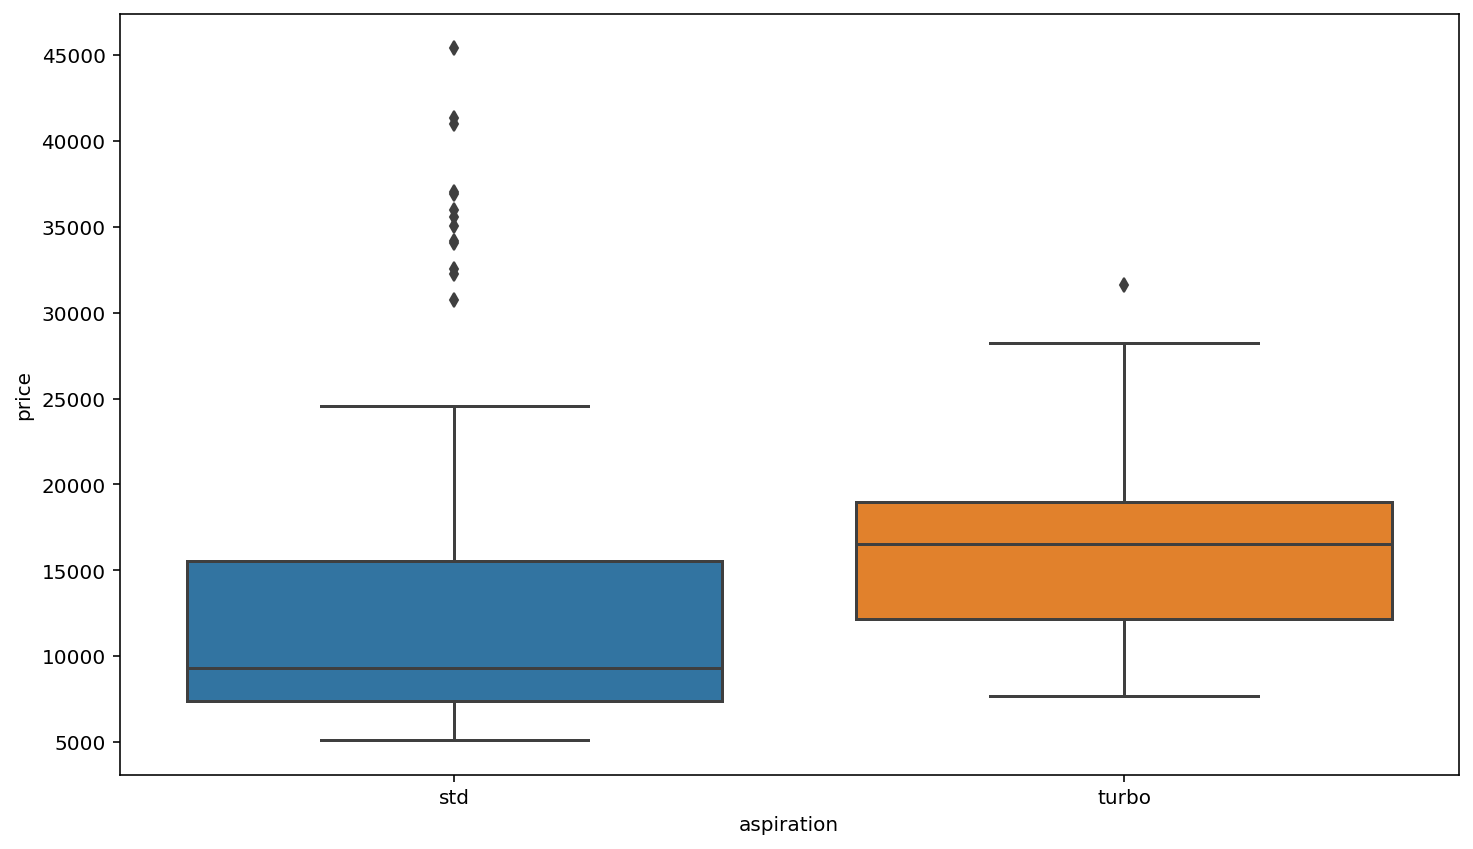

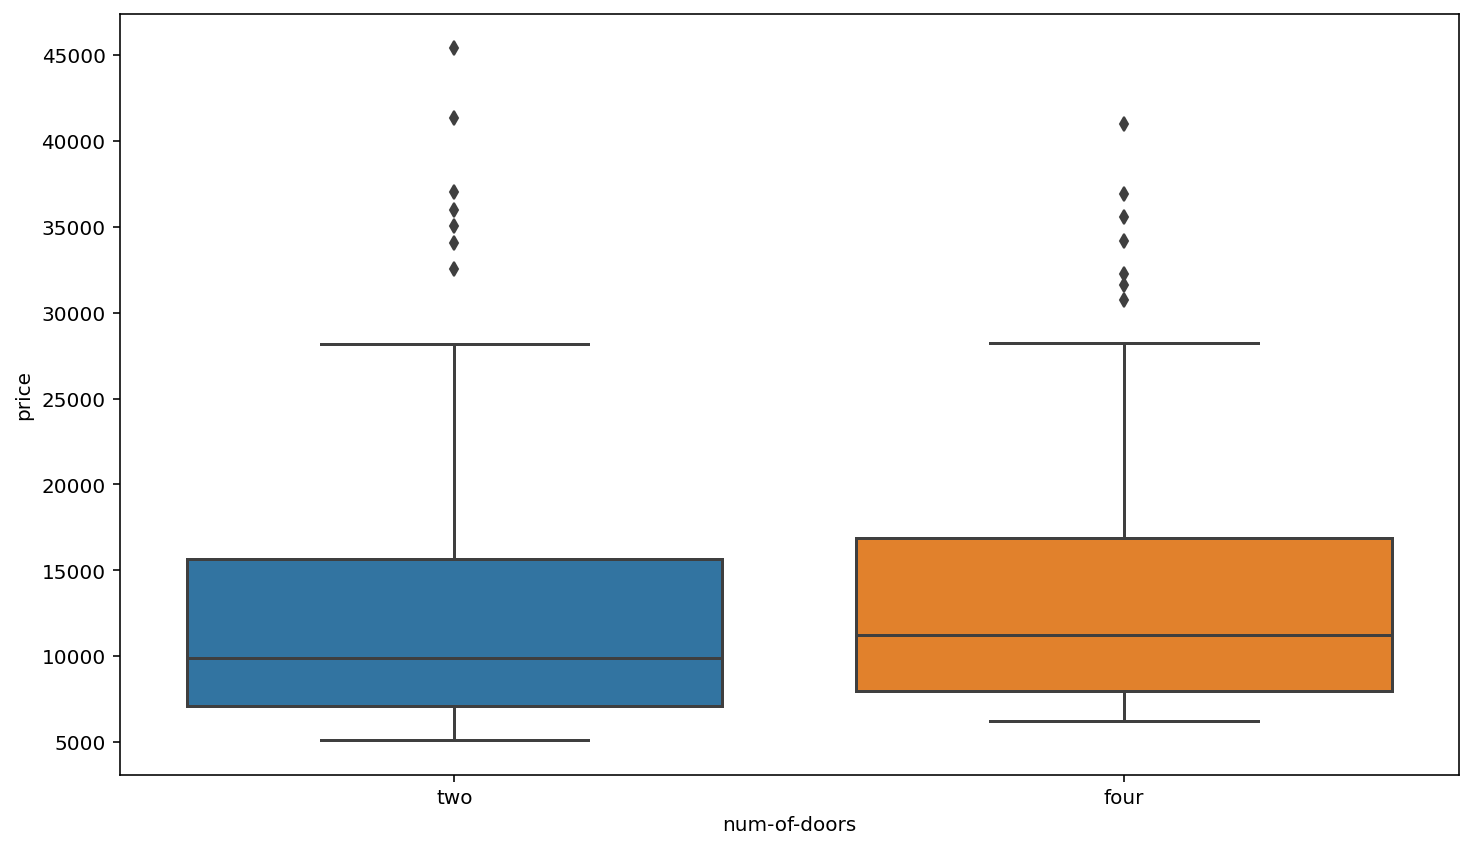

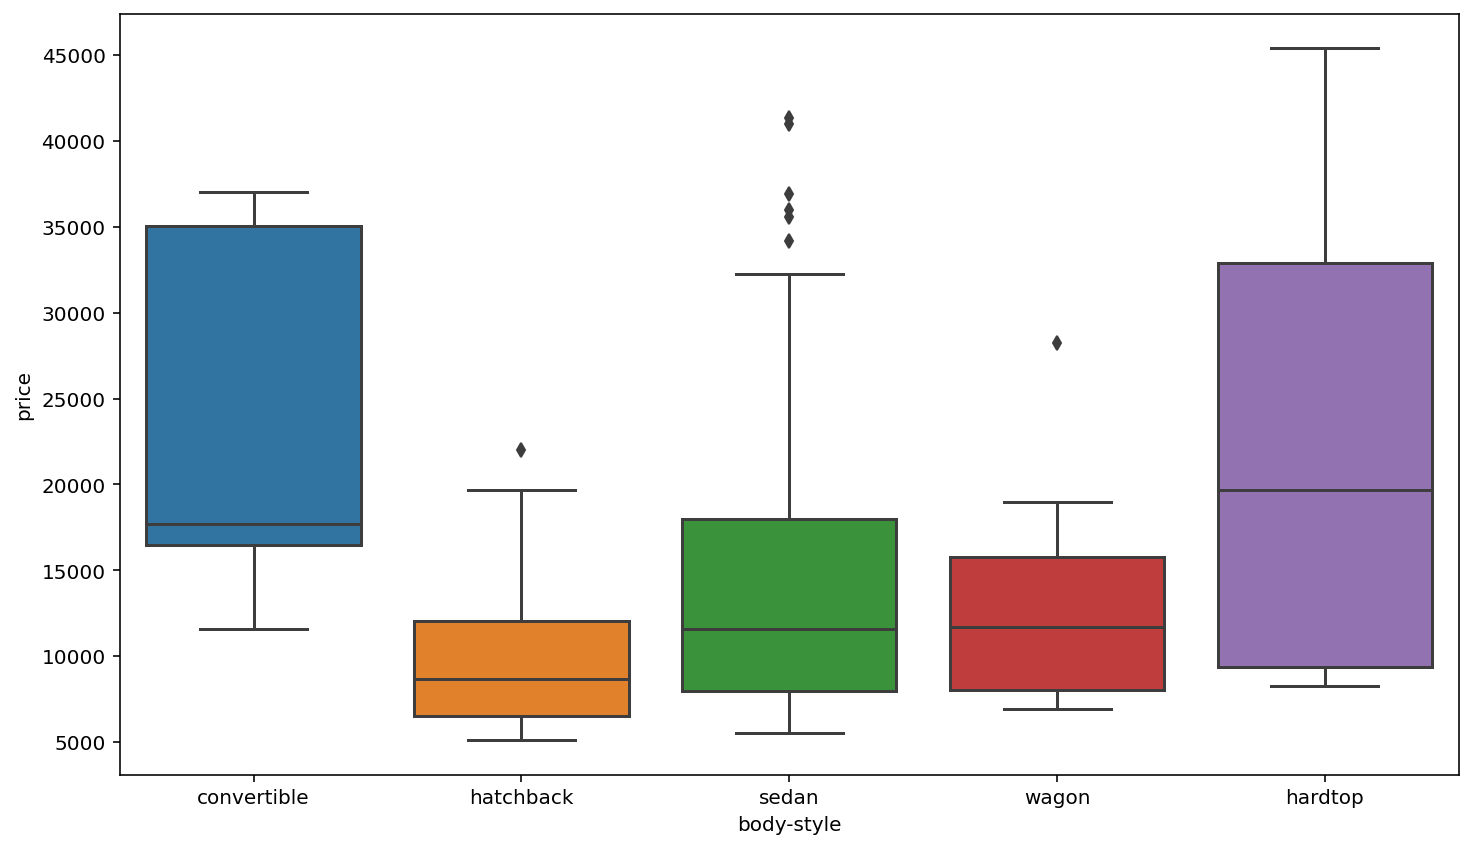

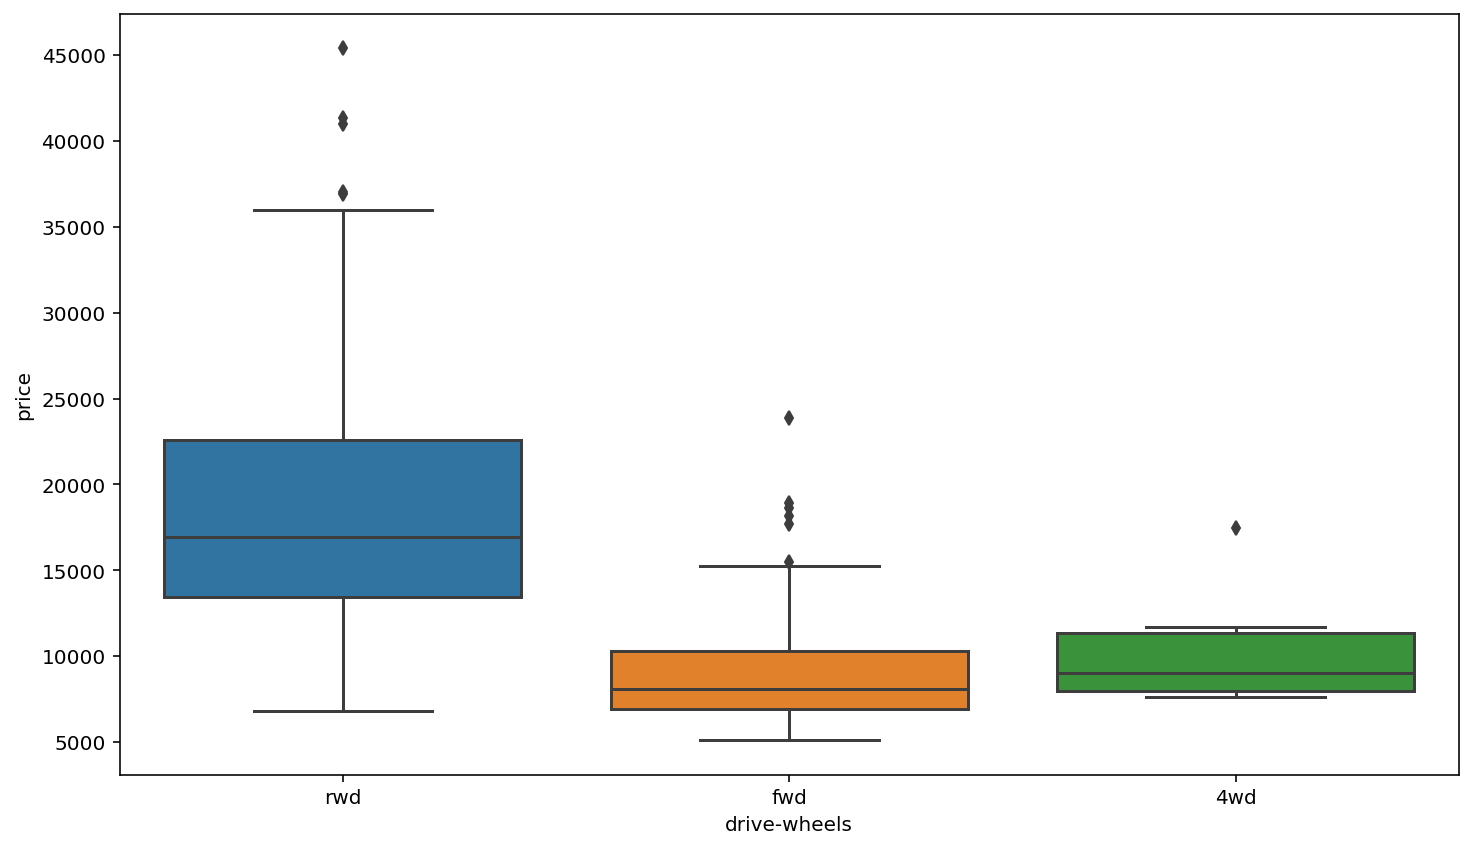

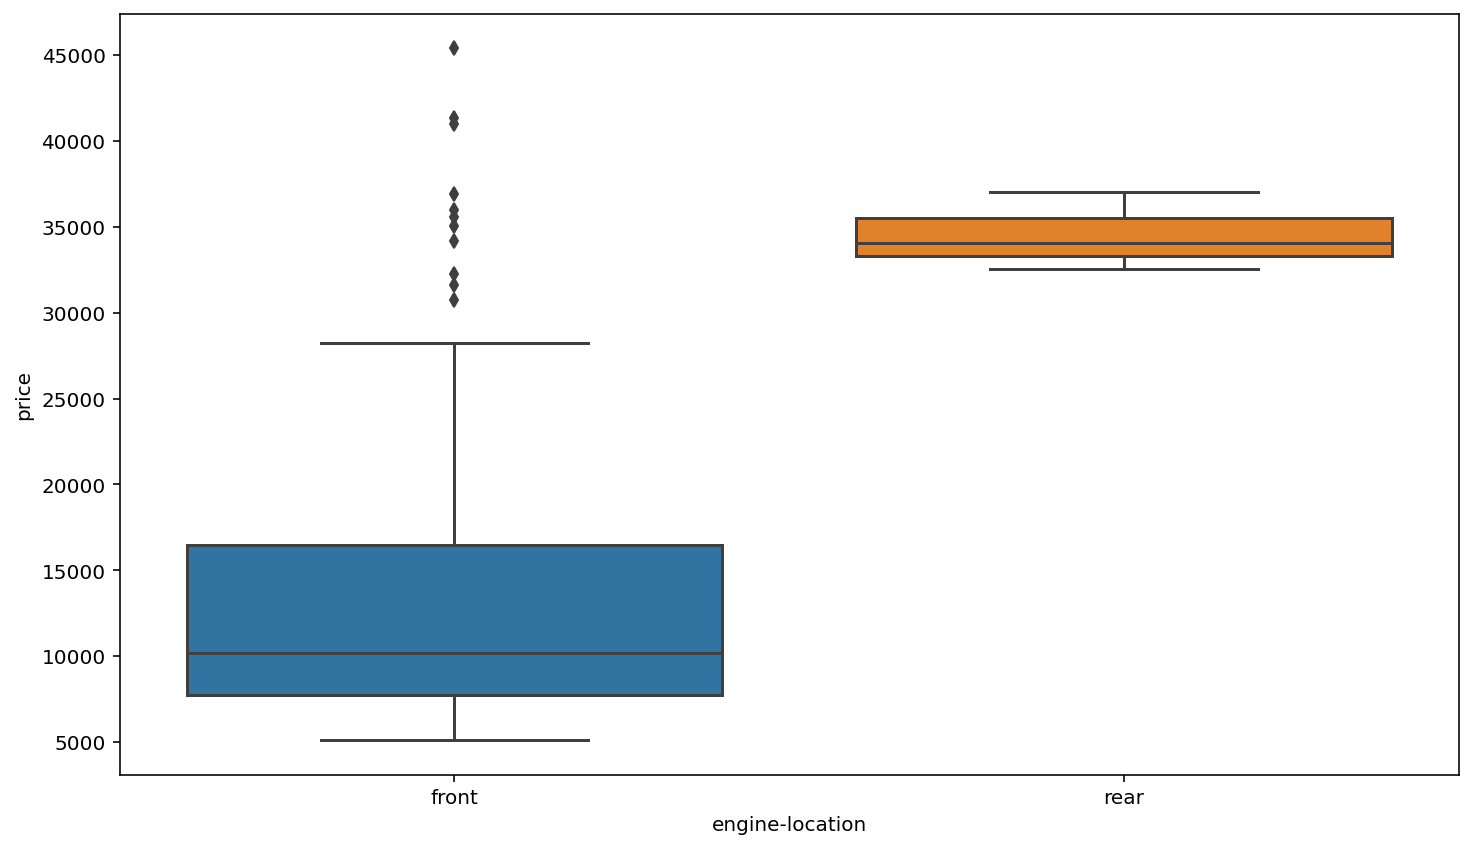

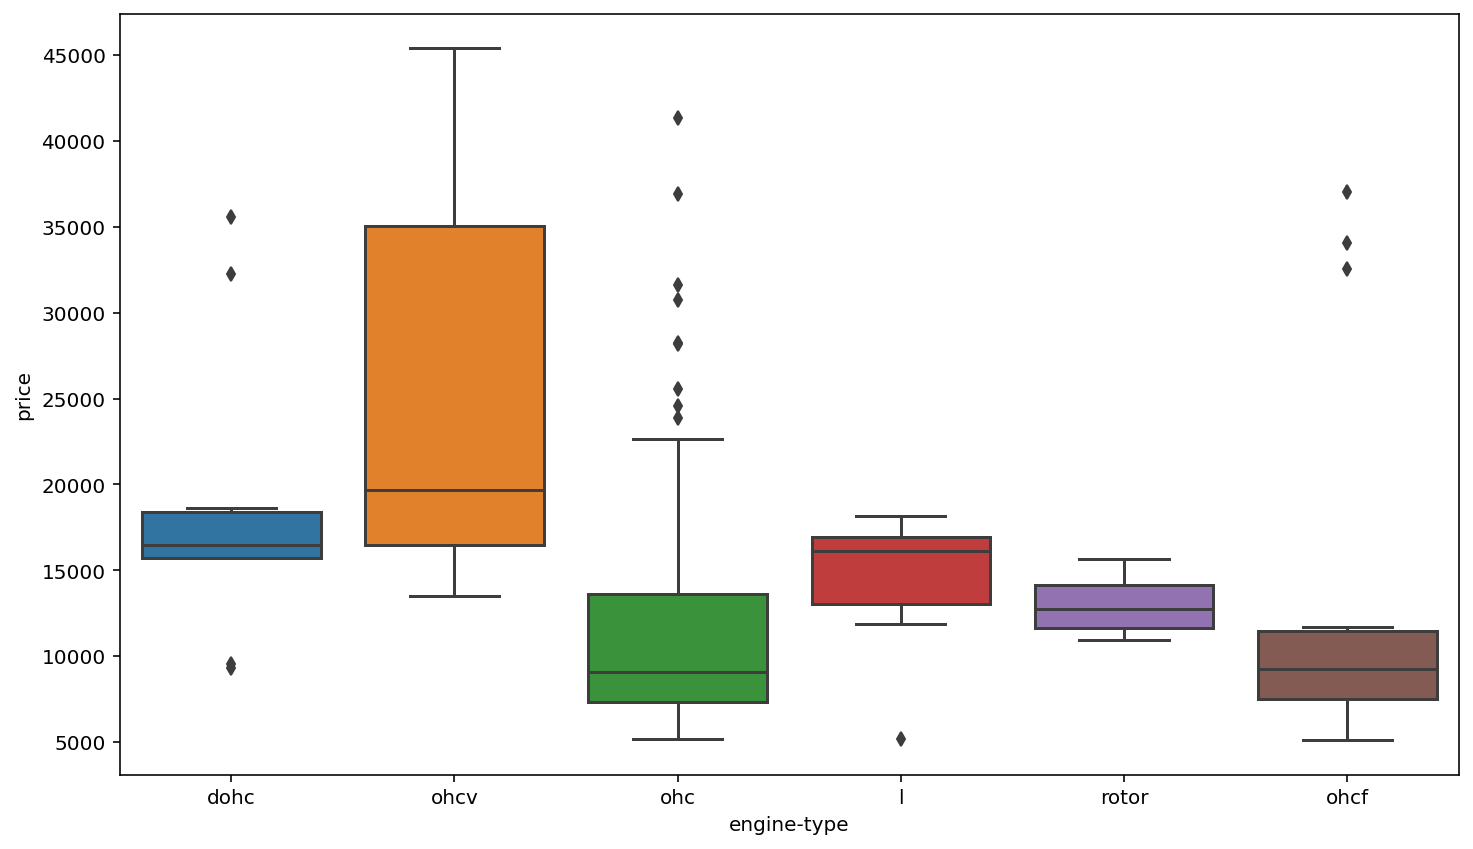

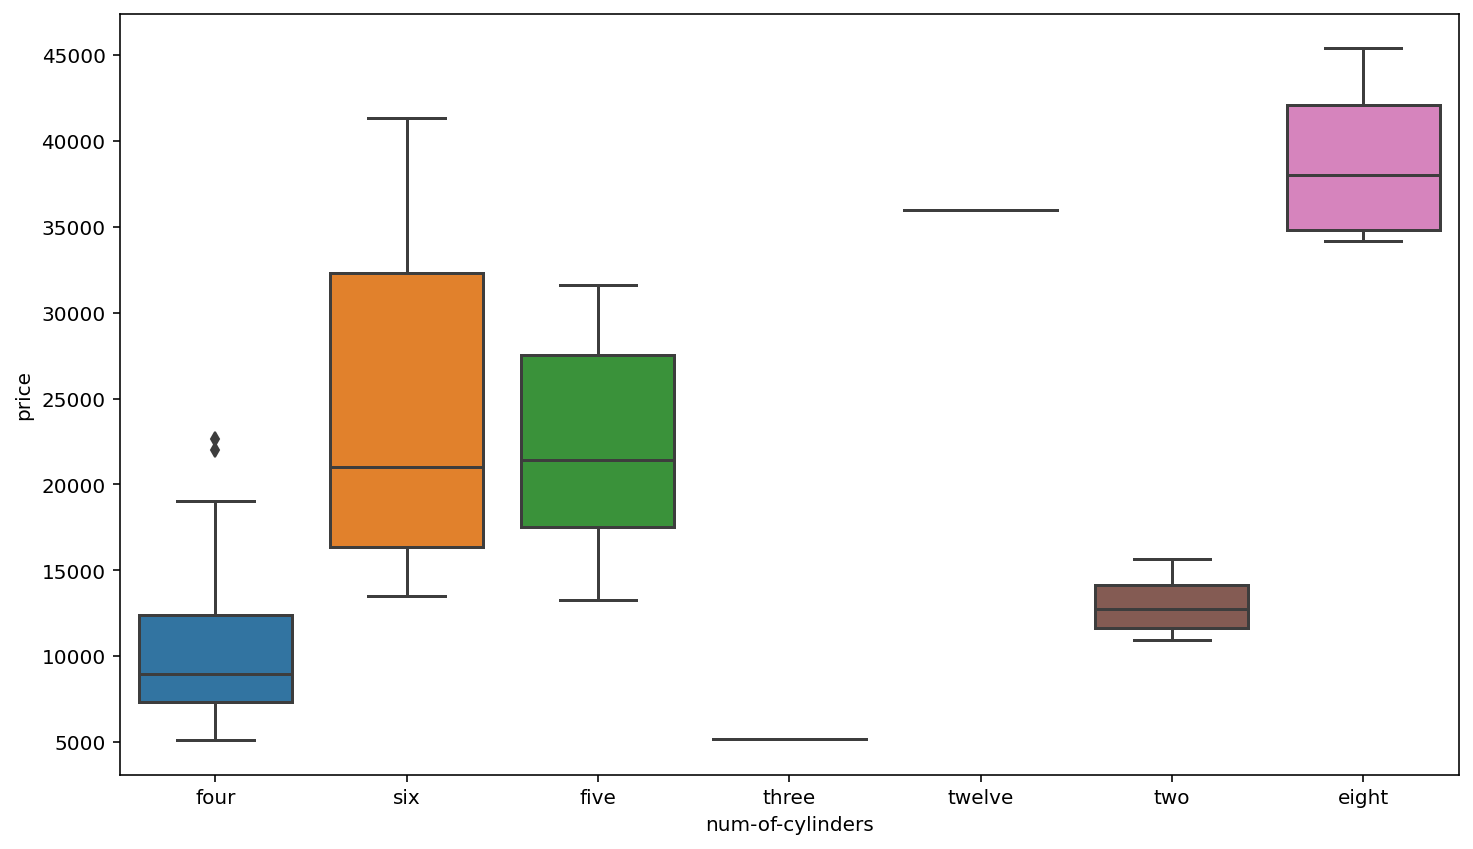

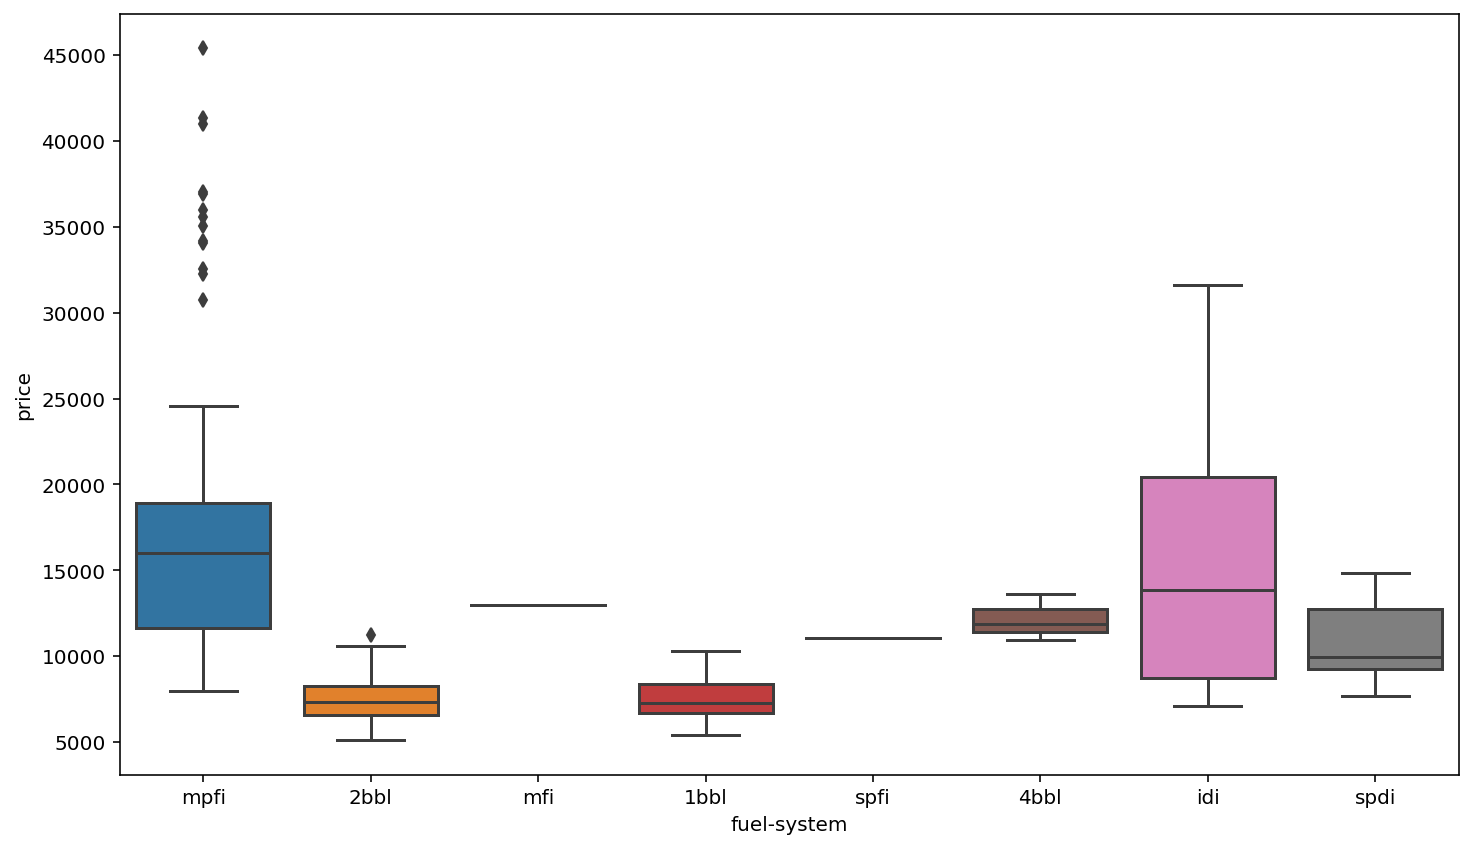

In [25]:
for col in ['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']:
    sns.boxplot(x=col, y='price', data=cat_data)
    plt.show()

In [26]:
cat_data['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,116
rwd,74
4wd,8


In [27]:
cat_data['num-of-cylinders'].value_counts().to_frame()

,num-of-cylinders
four,154
six,24
five,10
two,4
eight,4
three,1
twelve,1


In [28]:
cat_data['engine-location'].value_counts().to_frame()

,engine-location
front,195
rear,3


In [63]:
# features
features = num_data[['length', 'width', 'curb-weight', 'engine-size', 'horsepower', 'city-km/l', 'highway-km/l']]
# target
target = num_data['price']

In [30]:
# splitting data
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [31]:
# univariate model - training one feature at the time (from the 'features', dataset); k=deafult
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def univar_model(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows in data frame
    shuffled_index = np.random.permutation(df.index)
    df_rand = df.reindex(shuffled_index)
    
    # Splitting df
    split = int(len(df_rand)*0.7)
    train_df = df_rand[:split]
    test_df = df_rand[split:]
    
    # Fit a KNN model using default k value
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model
    predictions = knn.predict(test_df[[train_col]])
    
    # calculate and return rmse
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
for col in features.columns:
    rmse = univar_model(col, 'price', num_data)
    rmse_results[col] = rmse
    
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size     2888.248373
curb-weight     3203.029272
width           3411.158725
highway-km/l    3464.583780
city-km/l       4124.704866
length          4602.253480
horsepower      5104.875169
dtype: float64

The optimal feature to train, among above chosen features, is **engine-size**.

In [32]:
# univariate model - training one feature at the time (from the 'features', dataset); k=[1,3,5,7,9]
def univar_k_model(train_col, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    df_rand = df.reindex(shuffled_index)
    
    split = int(len(df_rand)*0.7)
    train_df = df_rand[:split]
    test_df = df_rand[split:]
    
    k_values = [x for x in range(1,10,2)]
    k_rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        knn.fit(train_df[[train_col]], train_df[target_col])
        predictions = knn.predict(test_df[[train_col]])
        
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    
    return k_rmses

k_rmses_results = {}
for col in features.columns:
    k_rmses = univar_k_model(col, 'price', num_data)
    k_rmses_results[col] = k_rmses
    
k_rmses_results

{'length': {1: 5356.678351988914,
  3: 5187.733609733209,
  5: 4602.2534804883,
  7: 4632.102648465205,
  9: 4773.931081486398},
 'width': {1: 5229.5086815111035,
  3: 3903.3521258680366,
  5: 3411.1587250278067,
  7: 3392.129539526044,
  9: 3119.503289507967},
 'curb-weight': {1: 3507.3040881375923,
  3: 3510.671782816883,
  5: 3203.0292724232168,
  7: 2611.305166473076,
  9: 2688.8893905723435},
 'engine-size': {1: 4265.049184944999,
  3: 2755.2500521731235,
  5: 2888.248372976258,
  7: 3013.0501539025154,
  9: 2960.6737911379},
 'horsepower': {1: 5551.2490816632135,
  3: 4497.049826563254,
  5: 5104.875168764332,
  7: 4639.22220199203,
  9: 4552.9843192478575},
 'city-km/l': {1: 4672.260453998685,
  3: 3918.182087208112,
  5: 4124.70486596718,
  7: 3728.690041627302,
  9: 3757.5296739503315},
 'highway-km/l': {1: 4853.139135308884,
  3: 3572.4981681046543,
  5: 3464.5837797153454,
  7: 3429.310089726008,
  9: 3576.4329259856218}}

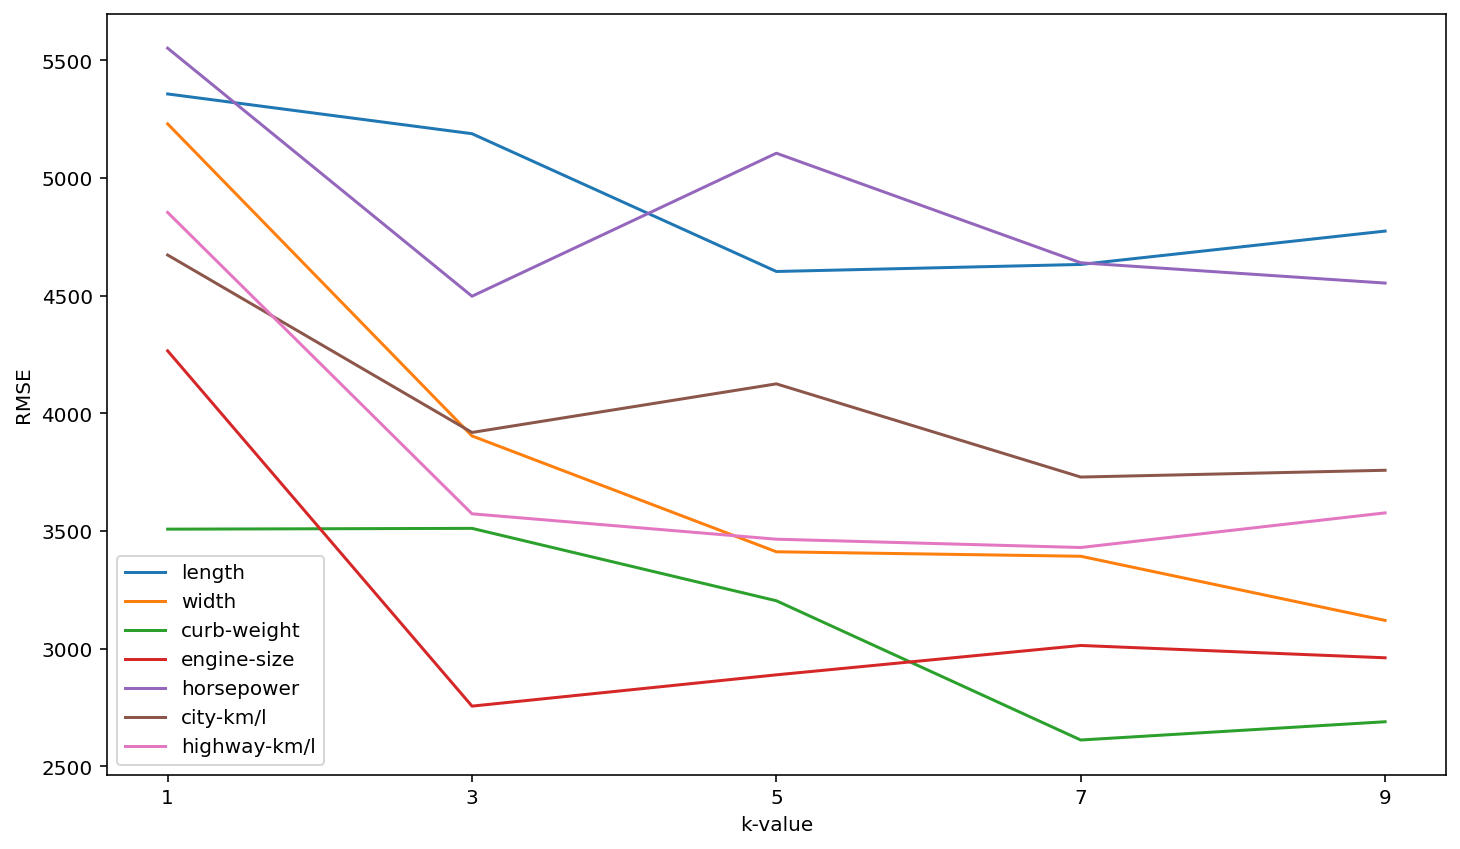

In [33]:
for k,v in k_rmses_results.items():
    x = list(v.keys())
    y = list(v.values())

    plt.plot(x, y, label=k)
    plt.xticks([x for x in range(1,10,2)])

plt.xlabel('k-value')
plt.ylabel('RMSE')
plt.legend()
plt.show()

The optimal feature to train is **curb-weight** at k=7

In [34]:
# avg value for every feature with different k
avg_rmses = {}
for k,v in k_rmses_results.items(): 
    mean_rmse = np.mean(list(v.values()))
    avg_rmses[k] = mean_rmse

avg_rmses_series = pd.Series(avg_rmses)
avg_rmses_sorted = avg_rmses_series.sort_values()
avg_rmses_sorted

curb-weight     3104.239940
engine-size     3176.454311
highway-km/l    3779.192820
width           3811.130472
city-km/l       4040.273425
horsepower      4869.076120
length          4910.539834
dtype: float64

In [42]:
# multivariate model with hyperparameter tuning - training more than one feature at the same time
def multivar_model(train_col, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    df_rand = df.reindex(shuffled_index)
    
    split = int(len(df_rand)*0.7)
    train_df = df_rand[:split]
    test_df = df_rand[split:]
    
    k_values = [i for i in range(5,25)] # hyperparameter tuning
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])
        predictions = knn.predict(test_df[train_col])
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    
    return k_rmses

k_rmses_results = {}
for feature_numb in range(2,7):
    k_rmses_results[f"{feature_numb} best features"] = multivar_model(avg_rmses_sorted.index[:feature_numb], 'price', num_data)

k_rmses_results

{'2 best features': {5: 2605.3757670119935,
  6: 2552.5400865644633,
  7: 2609.165926623499,
  8: 2577.701675497881,
  9: 2731.0243407546254,
  10: 2775.006345428181,
  11: 2849.0104121936583,
  12: 2982.3177881030906,
  13: 3126.8499361616573,
  14: 3219.9256331067795,
  15: 3322.7616257832547,
  16: 3421.597370786551,
  17: 3487.1623174108217,
  18: 3507.3263096240516,
  19: 3555.2211070922076,
  20: 3557.26072430857,
  21: 3557.511849330297,
  22: 3489.8001557243842,
  23: 3457.986078649295,
  24: 3464.375549395758},
 '3 best features': {5: 2567.9251877731954,
  6: 2612.10637713378,
  7: 2713.986940260539,
  8: 2753.426310554951,
  9: 2835.1527367932936,
  10: 2908.164540049273,
  11: 3010.1331787117447,
  12: 3100.269247883964,
  13: 3110.1923501023384,
  14: 3188.0135164318835,
  15: 3223.1076824957245,
  16: 3279.4648950677565,
  17: 3295.5304202084126,
  18: 3296.5571056907606,
  19: 3321.081819039311,
  20: 3374.0235010666424,
  21: 3338.061226288924,
  22: 3261.010291512411,
 

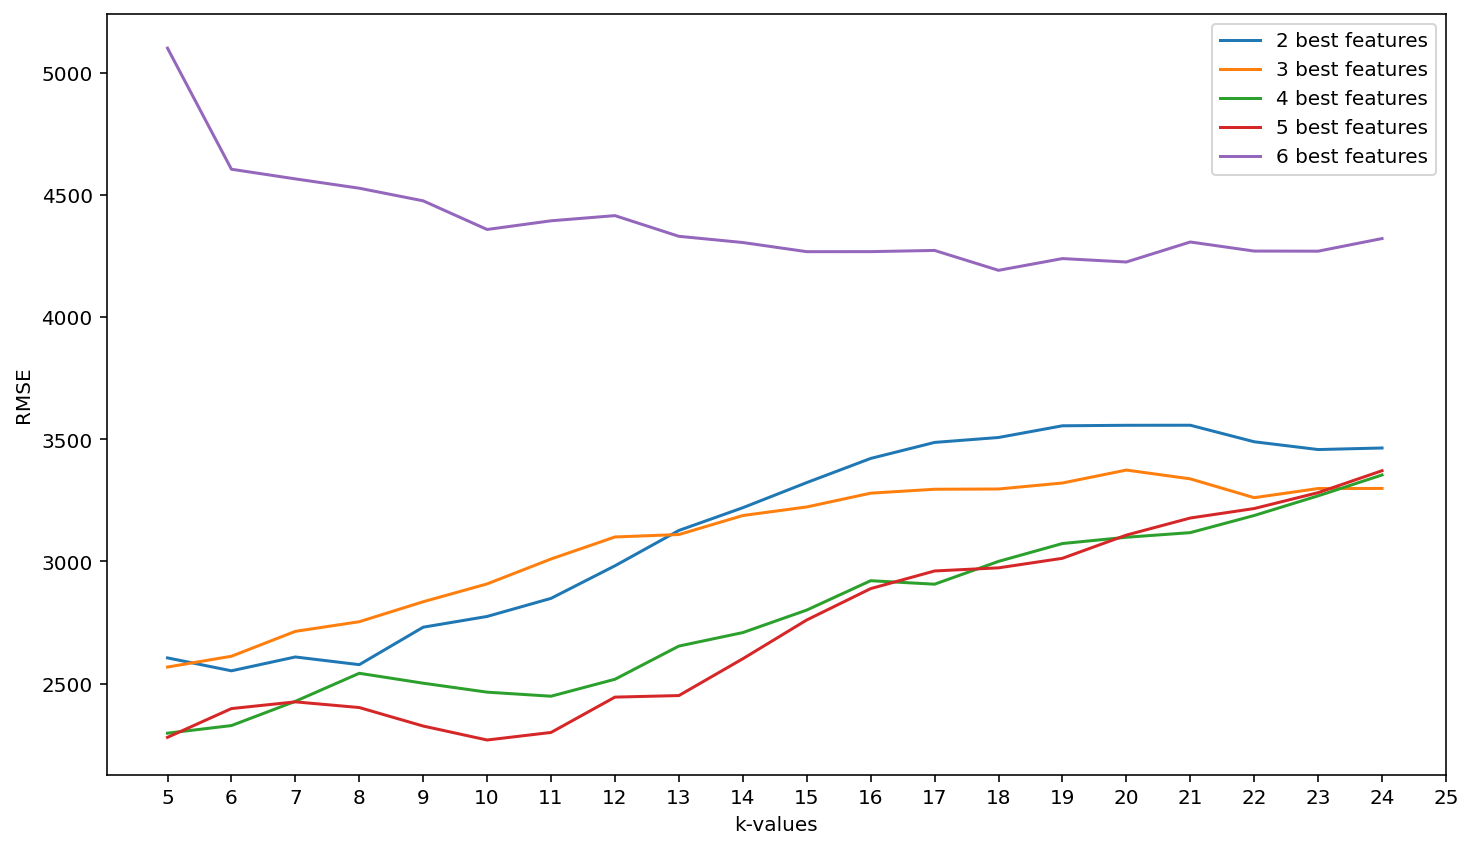

In [44]:
for k,v in k_rmses_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x, y, label=k)

plt.xlabel('k-values')
plt.ylabel('RMSE')
plt.xticks([i for i in range(5,26)])
plt.legend()
plt.show()

The optimal features to train are **'curb_weight', 'engine-size', 'highway-km/l', 'width' and 'city-km/l'** at k=10

In [81]:
# linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
predictions = {}
for col in ['length', 'width', 'curb-weight', 'engine-size', 'horsepower', 'city-km/l', 'highway-km/l']:
    X = num_data[[col]]
    y = num_data['price']
    lr.fit(X, y)
    predictions[col] = lr.predict(X)

predictions['length'][:5]

array([10785.36680388, 11855.51707482, 14263.35518445, 14263.35518445,
       14575.48234681])

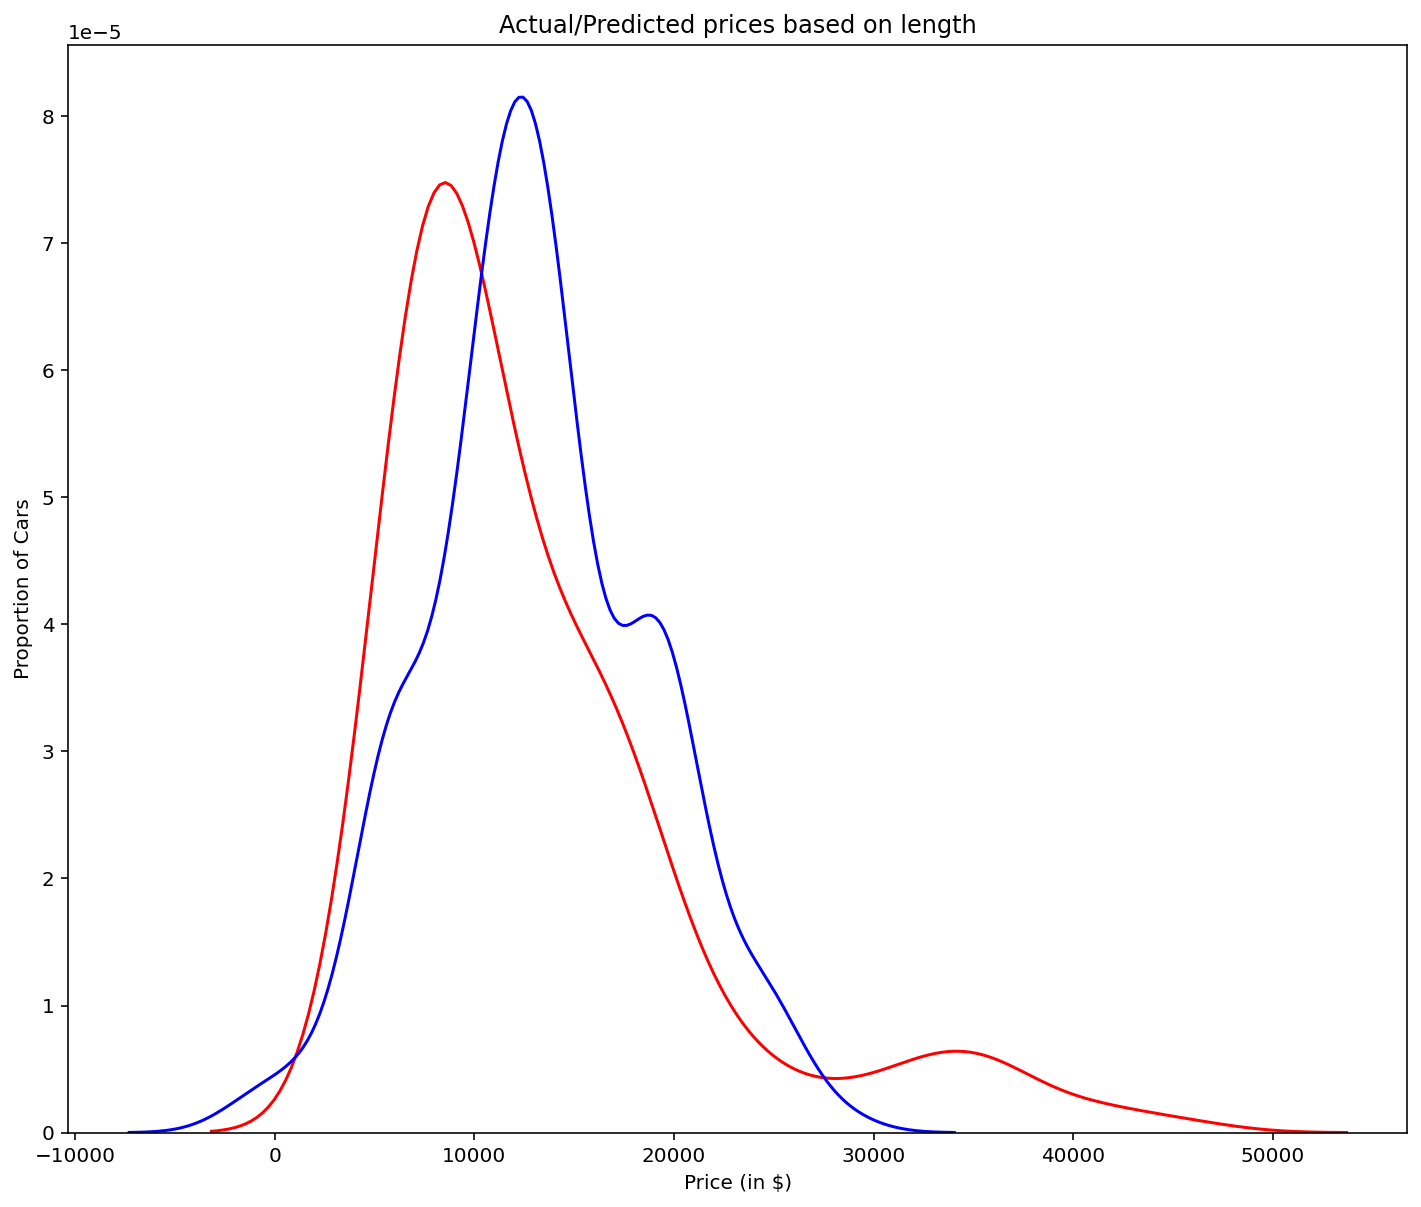

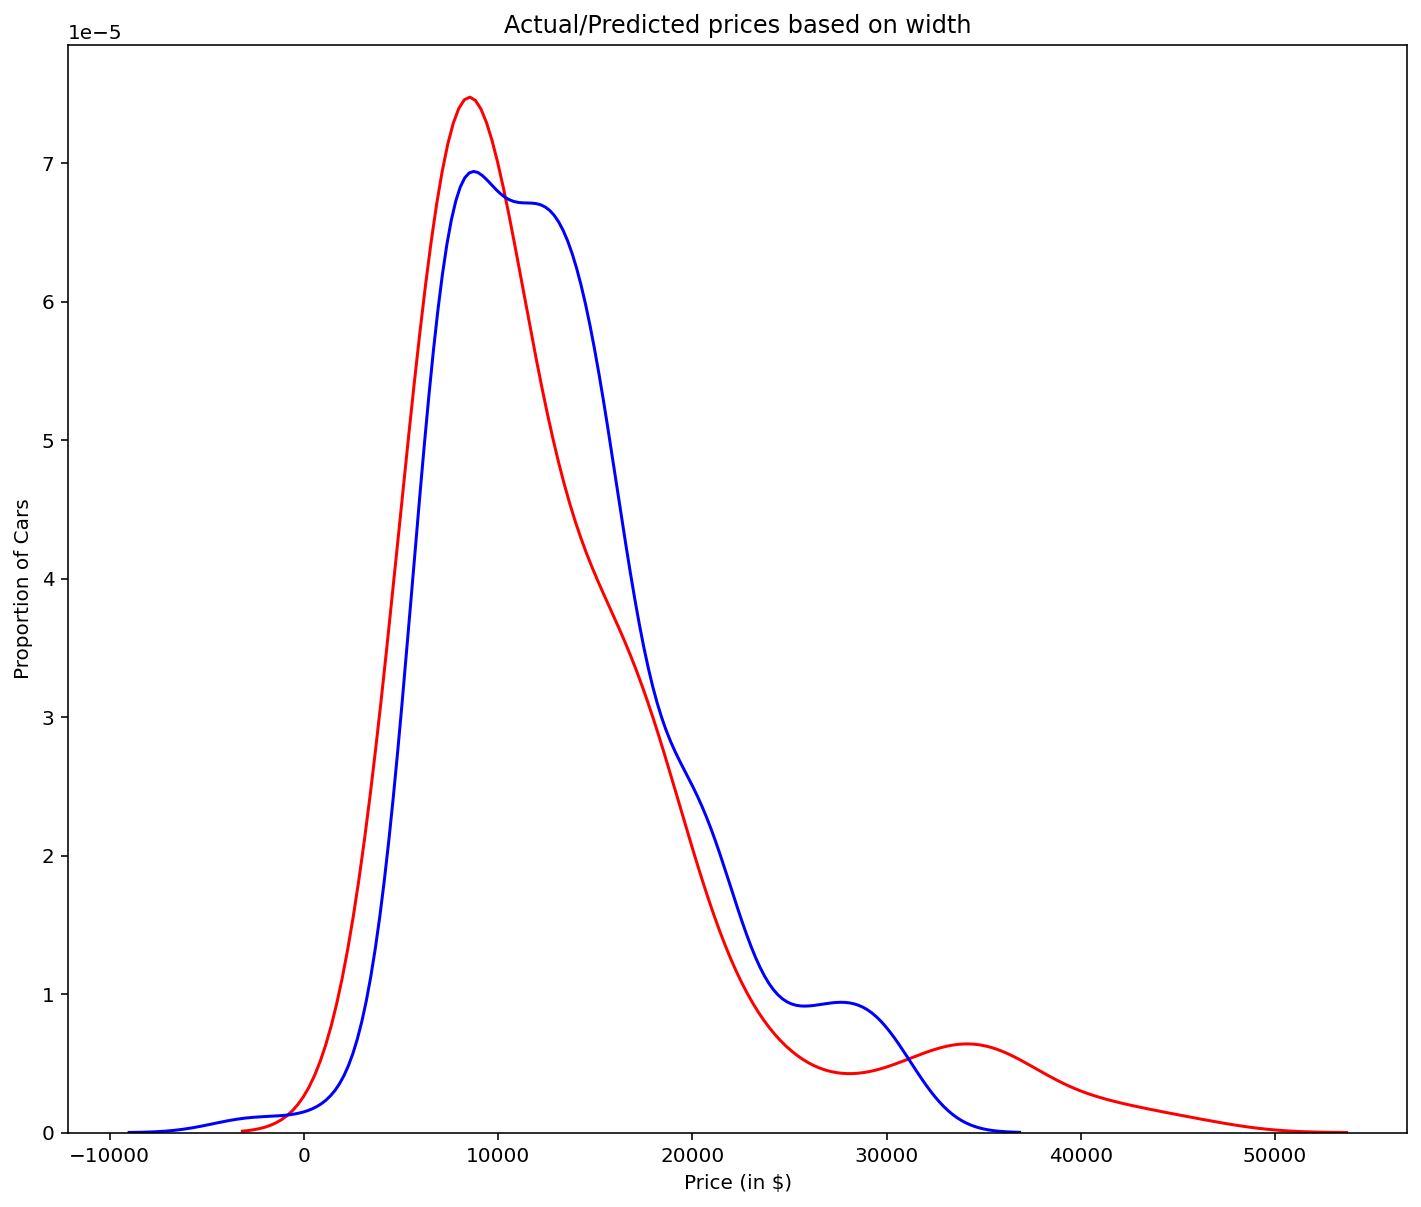

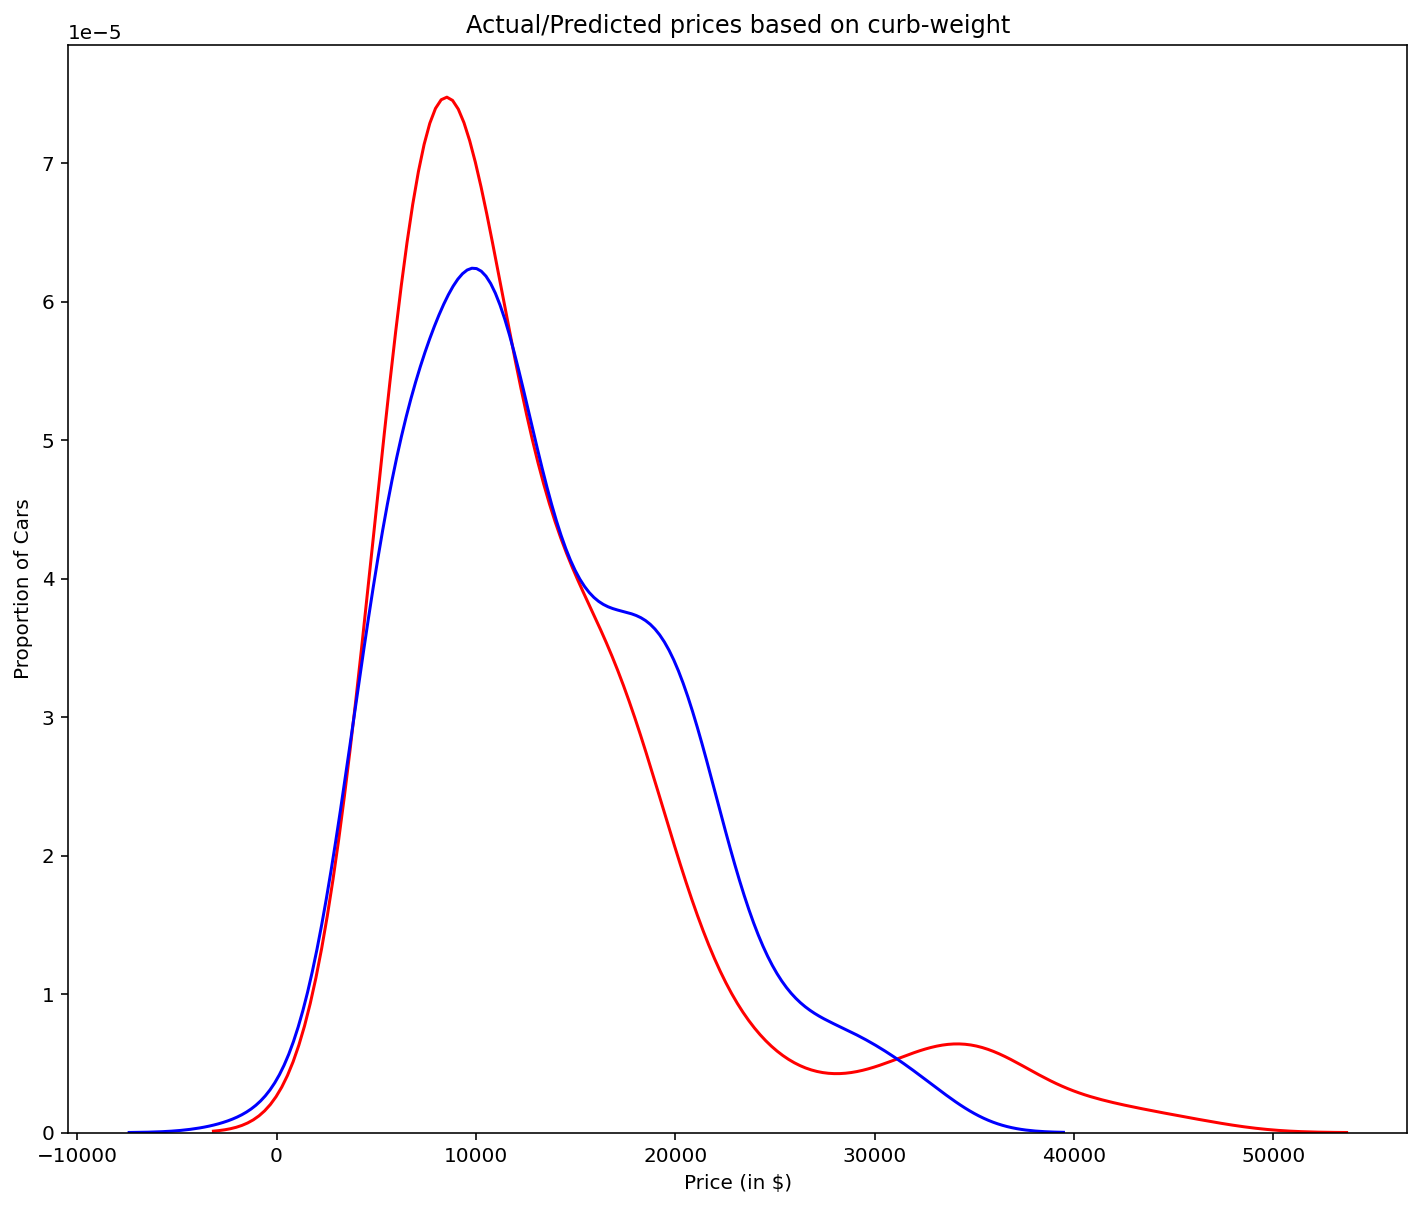

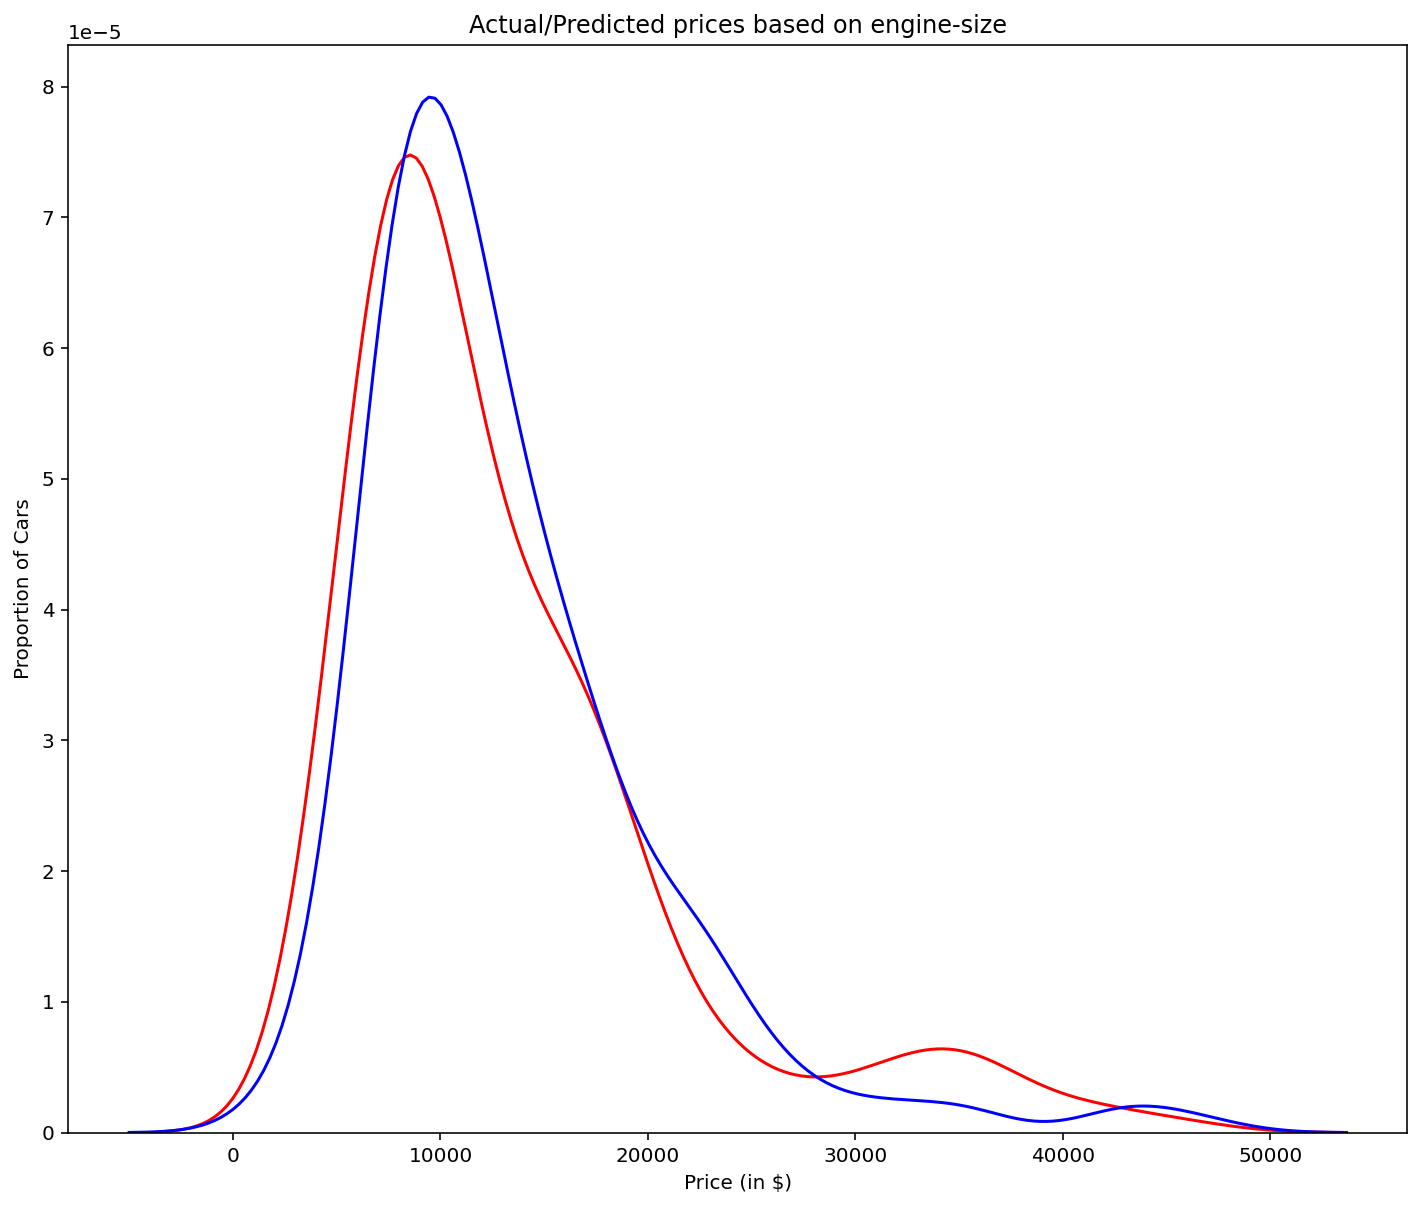

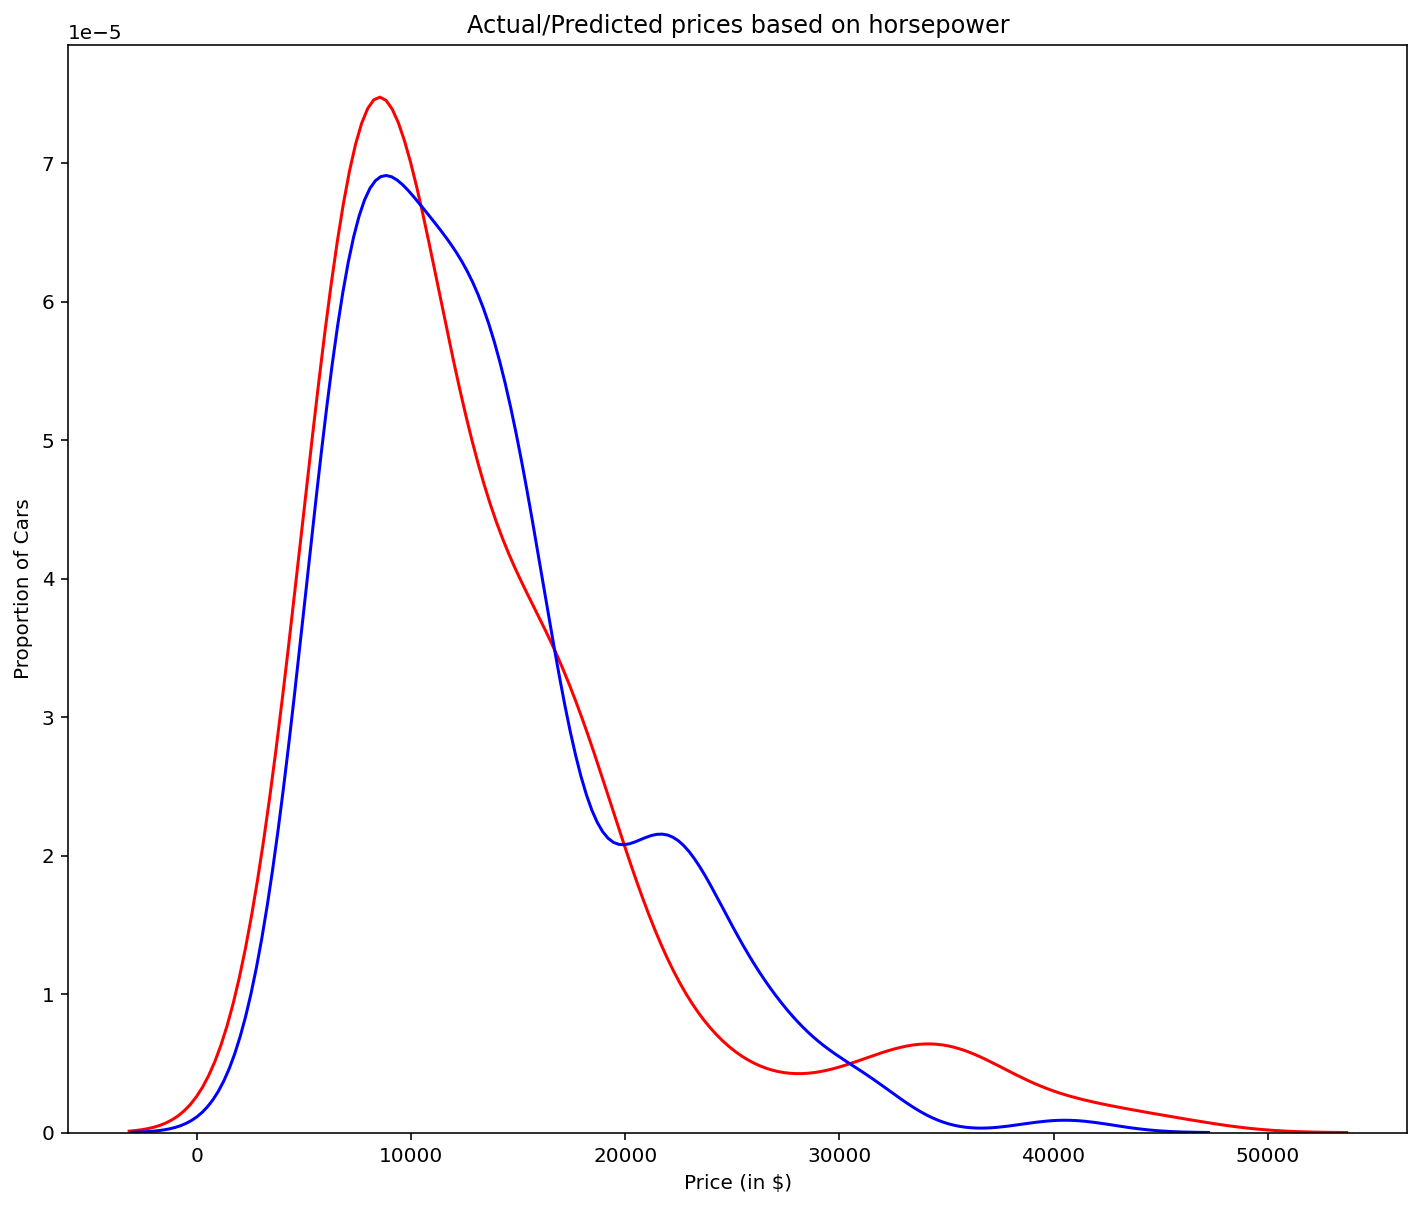

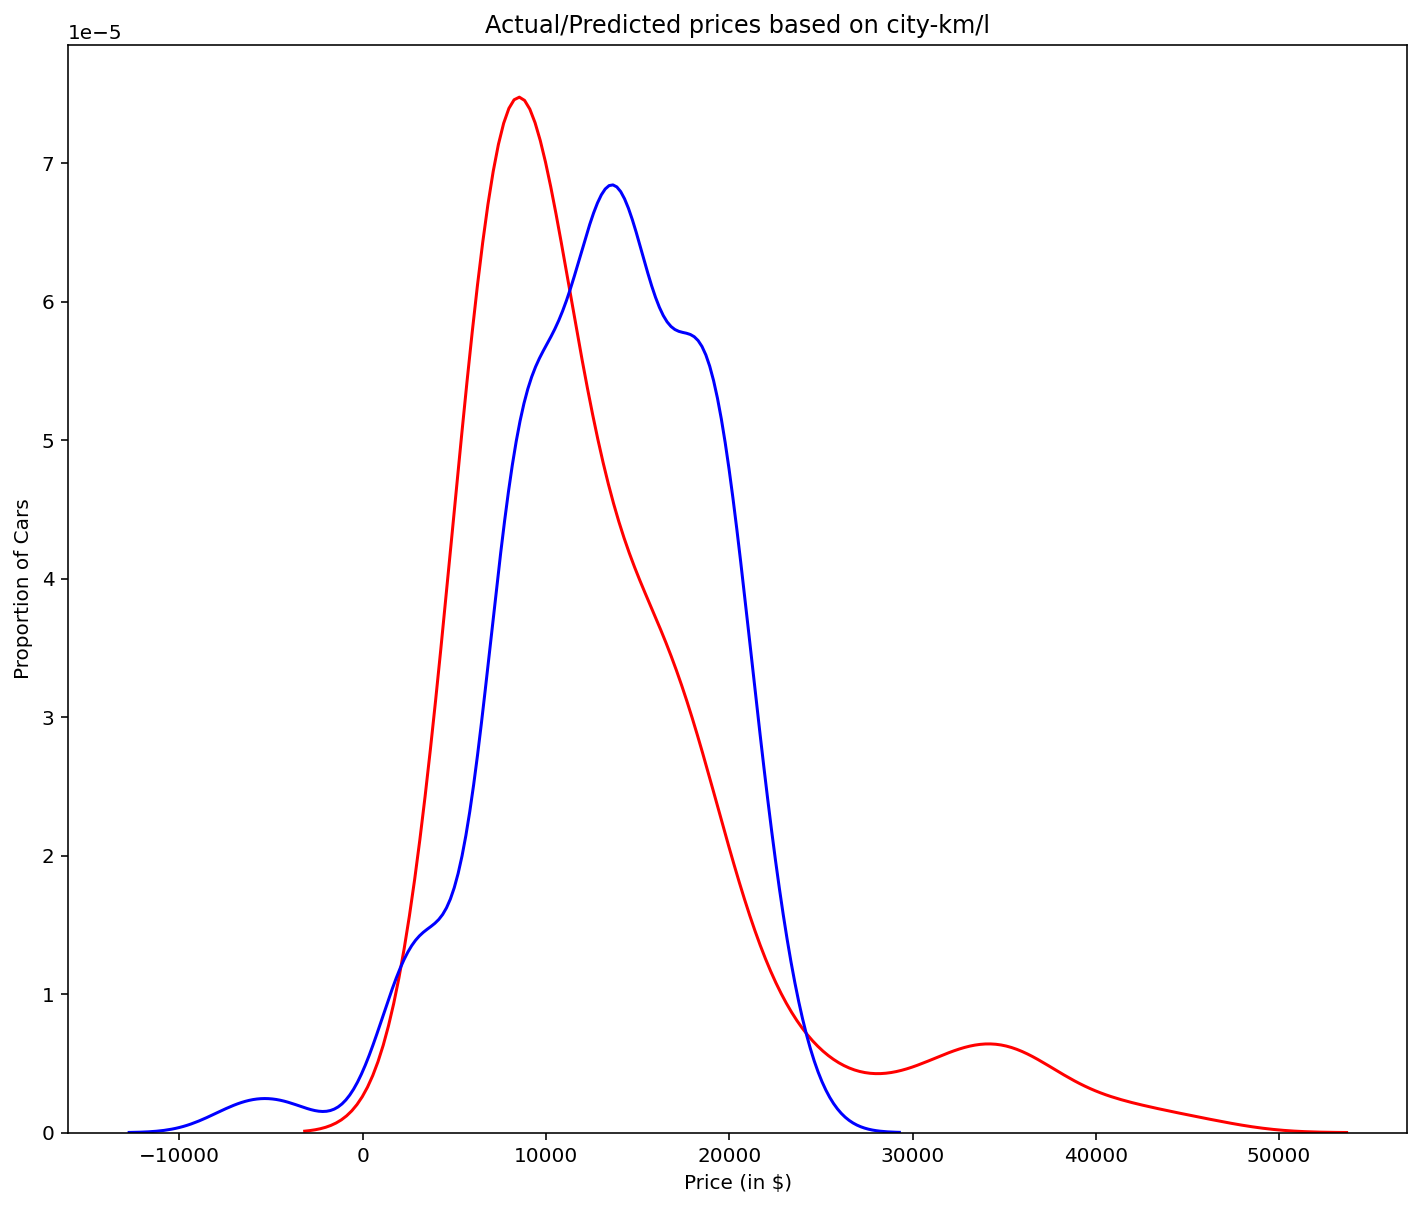

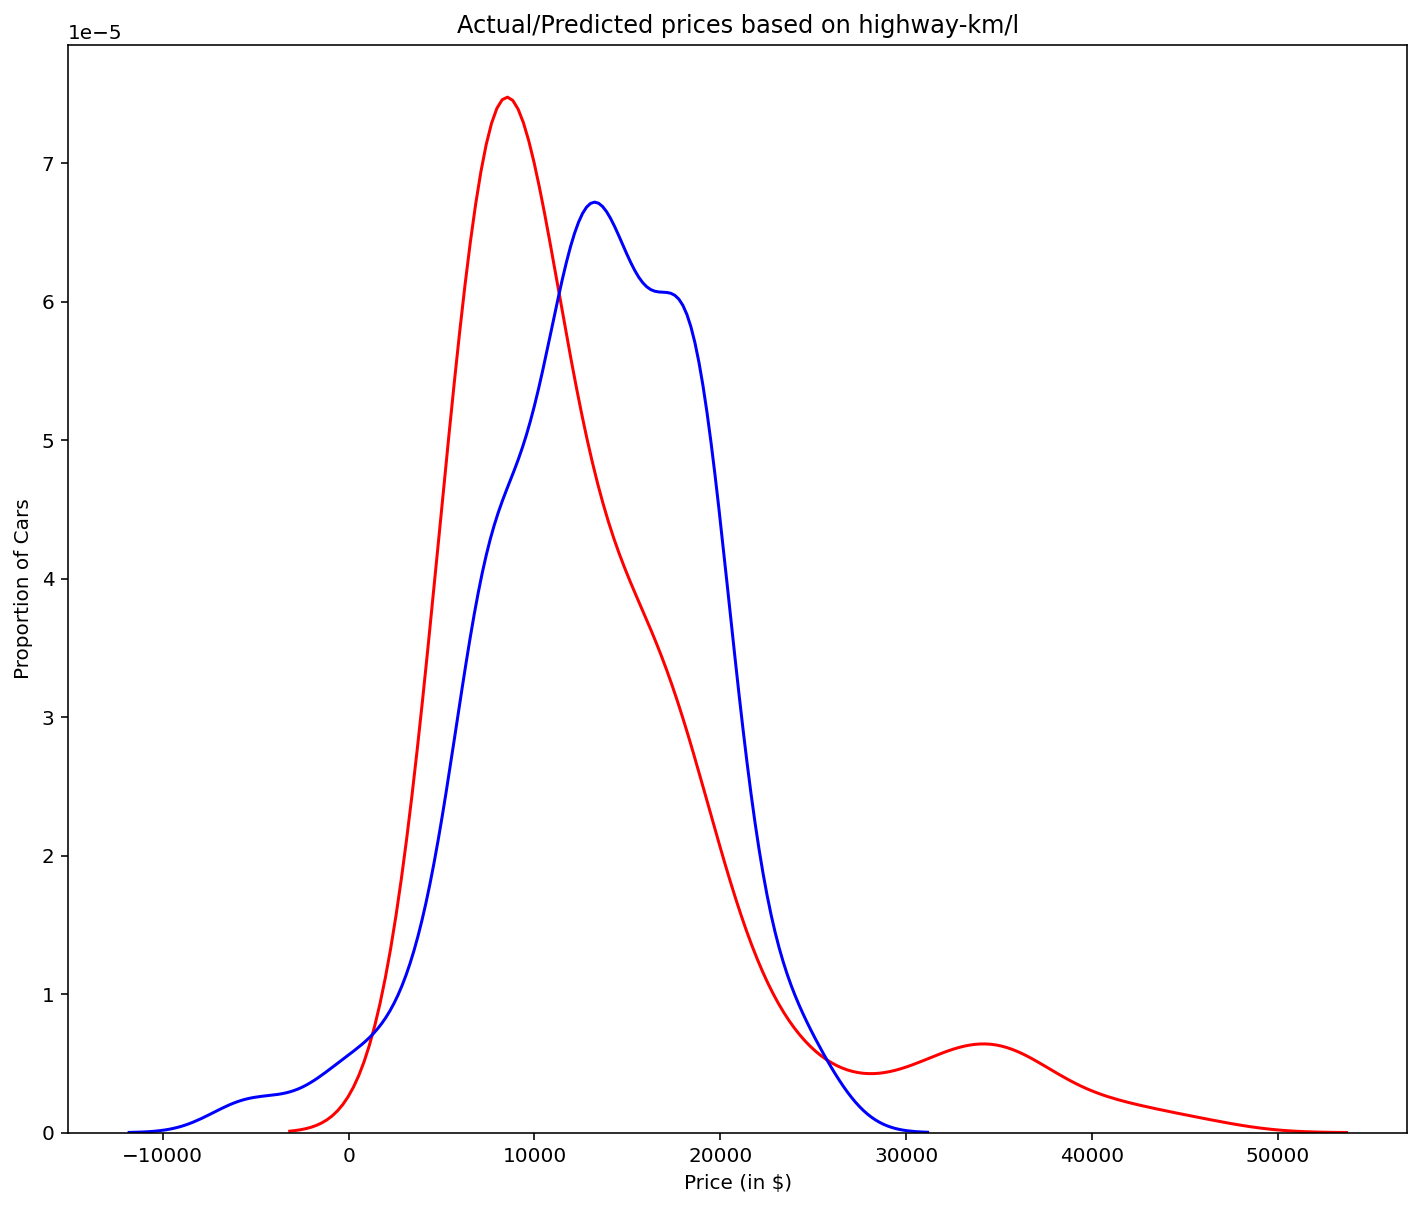

In [82]:
import warnings
warnings.filterwarnings('ignore')

for k in predictions:
    
    plt.figure(figsize=(12,10))
    sns.distplot(num_data['price'],hist=False,color="r",label="Actual Values")
    sns.distplot(predictions[k],hist=False,color="b",label="Predicted Values")

    plt.title(f"Actual/Predicted prices based on {k}")
    plt.xlabel("Price (in $)")
    plt.ylabel("Proportion of Cars")

    plt.show()